In [73]:
import os
import os.path as osp
import re
import pickle
import glob

import numpy as np
import pandas as pd

from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import torch
print(torch.__version__)

2.5.1+cu118


In [9]:
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA version:", torch.version.cuda)
print("CUDA devices:", [torch.cuda.device(i) for i in range(torch.cuda.device_count())])
print("CUDA_VISIBLE_DEVICES:", os.environ.get('CUDA_VISIBLE_DEVICES'))

# Try to allocate a tensor on GPU
try:
    device = torch.device('cuda:0')
    torch.tensor([1.0], device=device)
    print("Successfully allocated tensor on GPU.")
except Exception as e:
    print("Failed to allocate tensor on GPU:", e)

Is CUDA available: False
CUDA device count: 0
CUDA version: 11.8
CUDA devices: []
CUDA_VISIBLE_DEVICES: None
Failed to allocate tensor on GPU: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx


In [4]:
import sys
sys.path.insert(0, '/n/home09/pren/3DGeno_tools/src/gt3d/modules')
# sys.path.append('/n/home09/pren/Higashi')
# sys.path = ['/n/home09/pren/3DGeno_tools/src/gt3d/modules'] + sys.path
sys.path


['/n/home09/pren/3DGeno_tools/src/gt3d/modules',
 '/n/home09/pren/.conda/envs/gt3d/lib/python310.zip',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10/lib-dynload',
 '',
 '/n/home09/pren/.conda/envs/gt3d/lib/python3.10/site-packages',
 '/n/home09/pren/3DGeno_tools/src']

In [10]:
import higashi
print(higashi.__file__)

/n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/__init__.py


In [11]:
from higashi.Higashi_wrapper import *

In [71]:
higscratch_path = '/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/'
fish_path = os.path.join(higscratch_path, 'multiplexed_fish')
tnum = 4
ttag = 'epochs200'
tid = f't{tnum}_{ttag}'
filelist_path = os.path.join(fish_path, f't{tnum}_filelist')
contacts_path = os.path.join(fish_path, 'merfish_contacts')
dists_path = os.path.join(fish_path, 'merfish_dists')
libraries_path = '/n/home09/pren/libraries'


In [ ]:
# # Generate filelist.txt

# files = [os.path.join(contacts_path, file) for file in os.listdir(contacts_path) if os.path.isfile(os.path.join(contacts_path, file))]
# with open(os.path.join(filelist_path, 'filelist.txt'), 'w', encoding='utf-8') as f:
#     for file_path in files:
#         f.write(f"{file_path}\n")


In [27]:
cell_df = pd.read_csv(os.path.join(fish_path, '4DNESMTNNB3N/4DNFIA7FUW8Y.csv'), skiprows=22)
cell_df = cell_df.rename(columns={'##columns=(Cell_ID': 'Cell_ID', 'Zfp804b)': 'Zfp804b'})
cell_df


Cell_ID  FOV_ID  \
0      103489270985795086009915676188840872439       0   
1      113811790893231448949429397438012891173       0   
2      119547840309256440899855144626134392385       0   
3      120849314423504941338008541020153695260       0   
4      125550627244524118102850004242680097855       0   
...                                        ...     ...   
17851   89740340849279220555487673174291177981     167   
17852   90550019712359509388050476283813007625     167   
17853   91790428117198932838975210302149417238     167   
17854   95847719459140129344505526245510134602     167   
17855   98631367793753865210420375896077451174     167   

       cell_volume_from_merlin  cell_center_x_global  cell_center_y_global  \
0                   403.121799          -5984.643199           3962.926100   
1                  1345.443053          -6046.845801           3943.378100   
2                   866.273544          -6009.207800           3915.406099   
3                  1186.181156          -6114.885802           3938.572100   
4                   281.811702          -6190.485804           3985.876101   
...                        ...                   ...                   ...   
17851               746.108561           3028.620050          -2372.662093   
17852               931.565237           3093.798051          -2484.658096   
17853               146.709916           3073.926051          -2429.902094   
17854               264.662706           3019.332049          -2441.458095   
17855               237.911553           3176.202053          -2464.462095   

       RNA_experiment_ID          Sample_ID cluster_subclass cluster_class  \
0               20220304  C57BL/6_M_1_MOp_1            Astro         Astro   
1               20220304  C57BL/6_M_1_MOp_1            other         other   
2               20220304  C57BL/6_M_1_MOp_1            other         other   
3               20220304  C57BL/6_M_1_MOp_1            other         other   
4               20220304  C57BL/6_M_1_MOp_1             Peri          Peri   
...                  ...                ...              ...           ...   
17851           20220304  C57BL/6_M_1_MOp_1          L5/6 NP         Gluta   
17852           20220304  C57BL/6_M_1_MOp_1            L6 CT         Gluta   
17853           20220304  C57BL/6_M_1_MOp_1            Astro         Astro   
17854           20220304  C57BL/6_M_1_MOp_1            L6 CT         Gluta   
17855           20220304  C57BL/6_M_1_MOp_1            Oligo         Oligo   

      neuron_identity  ...  Unc13c  Unc5b  Unc5d  Ust  Vipr2  Vtn  Vwc2  \
0        Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
1               other  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
2               other  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
3               other  ...     0.0    0.0    0.0  0.0    0.0  0.0   1.0   
4        Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  1.0   0.0   
...               ...  ...     ...    ...    ...  ...    ...  ...   ...   
17851        Neuronal  ...     5.0    0.0    0.0  1.0    1.0  0.0   0.0   
17852        Neuronal  ...     1.0    0.0    0.0  2.0    0.0  0.0   0.0   
17853    Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
17854        Neuronal  ...     0.0    0.0    0.0  3.0    0.0  0.0   0.0   
17855    Non-Neuronal  ...     0.0    4.0    0.0  4.0    0.0  0.0   0.0   

       Wipf3  Wnt7b  Zfp804b  
0        0.0    0.0      0.0  
1        0.0    0.0      0.0  
2        1.0    0.0      0.0  
3        0.0    0.0      0.0  
4        0.0    0.0      0.0  
...      ...    ...      ...  
17851    8.0    0.0      1.0  
17852   30.0    0.0      0.0  
17853    0.0    0.0      0.0  
17854    4.0    0.0      1.0  
17855    0.0    0.0      0.0  

[17856 rows x 252 columns]

In [28]:
cell_ids = [re.search('cell\d+', filename).group()[4:] for filename in os.listdir(contacts_path)]
len(cell_ids)

2413

In [29]:
training_data_meta = pd.DataFrame(cell_ids, columns=['Cell_ID']).merge(cell_df, on='Cell_ID', how='left')
training_data_meta

Cell_ID  FOV_ID  \
0     100143354915909514340563966591344282617    84.0   
1     100444929727335622562402977796883679092     8.0   
2     100636001562801092372127493520169017848    75.0   
3     100641667178165970074422975257012665391    84.0   
4     100645494773040598441840741335181821324    81.0   
...                                       ...     ...   
2408   99732441040257909568179107546777692281    85.0   
2409   99760521419024717766427788907150197811    84.0   
2410   99806661526131685558261006620437651282    72.0   
2411   99895158179073067511837782015760741030     9.0   
2412   99926991096702427762005918916944379629    92.0   

      cell_volume_from_merlin  cell_center_x_global  cell_center_y_global  \
0                  852.211658           2475.098099          -1024.199995   
1                  844.089198          -5802.457800           4135.278100   
2                  598.349001          -6372.189898           5324.277907   
3                  762.882093           2494.970100          -1057.625996   
4                  917.879399           2390.604102           -437.051995   
...                       ...                   ...                   ...   
2408              1189.559867           2588.552102           -950.289998   
2409               554.913079           2633.588103          -1030.841995   
2410               625.749255          -6655.781900           5085.343906   
2411               498.213556          -5864.665801           3896.452099   
2412              1133.789731           2640.106098           -300.987997   

      RNA_experiment_ID          Sample_ID cluster_subclass cluster_class  \
0            20220304.0  C57BL/6_M_1_MOp_1          L2/3 IT         Gluta   
1            20220304.0  C57BL/6_M_1_MOp_1             Endo          Endo   
2            20220304.0  C57BL/6_M_1_MOp_1             VLMC          VLMC   
3            20220304.0  C57BL/6_M_1_MOp_1             Endo          Endo   
4            20220304.0  C57BL/6_M_1_MOp_1            Astro         Astro   
...                 ...                ...              ...           ...   
2408         20220304.0  C57BL/6_M_1_MOp_1              Sst          GABA   
2409         20220304.0  C57BL/6_M_1_MOp_1            L5 IT         Gluta   
2410         20220304.0  C57BL/6_M_1_MOp_1             Endo          Endo   
2411         20220304.0  C57BL/6_M_1_MOp_1            Micro         Micro   
2412         20220304.0  C57BL/6_M_1_MOp_1          L2/3 IT         Gluta   

     neuron_identity  ...  Unc13c  Unc5b  Unc5d  Ust  Vipr2  Vtn  Vwc2  Wipf3  \
0           Neuronal  ...     2.0    2.0    0.0  1.0    0.0  0.0   0.0   33.0   
1       Non-Neuronal  ...     2.0    0.0    0.0  2.0    0.0  0.0   0.0    0.0   
2       Non-Neuronal  ...     1.0    0.0    0.0  0.0    0.0  0.0   0.0    0.0   
3       Non-Neuronal  ...     2.0    5.0    0.0  0.0    0.0  1.0   0.0    0.0   
4       Non-Neuronal  ...     2.0    0.0    0.0  0.0    0.0  0.0   0.0    1.0   
...              ...  ...     ...    ...    ...  ...    ...  ...   ...    ...   
2408        Neuronal  ...    13.0    2.0    6.0  7.0    1.0  1.0  13.0   17.0   
2409        Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0    0.0   
2410    Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0    1.0   
2411    Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0    0.0   
2412        Neuronal  ...     1.0    0.0    7.0  0.0    1.0  0.0   2.0   41.0   

      Wnt7b  Zfp804b  
0       0.0      1.0  
1       0.0      0.0  
2       0.0      0.0  
3       0.0      0.0  
4       3.0      0.0  
...     ...      ...  
2408    1.0      0.0  
2409    1.0      0.0  
2410    0.0      0.0  
2411    0.0      0.0  
2412    1.0      0.0  

[2413 rows x 252 columns]

In [44]:
def id_celltype(celltype):
    if celltype == 'GABA':
        return 'Gaba'
    elif celltype == 'Gluta':
        return 'Glut'
    else:
        return 'NN'

In [45]:
training_data_meta['NeuroTransmitters'] = training_data_meta['cluster_class'].apply(id_celltype)
training_data_meta

Cell_ID  FOV_ID  \
0     100143354915909514340563966591344282617    84.0   
1     100444929727335622562402977796883679092     8.0   
2     100636001562801092372127493520169017848    75.0   
3     100641667178165970074422975257012665391    84.0   
4     100645494773040598441840741335181821324    81.0   
...                                       ...     ...   
2408   99732441040257909568179107546777692281    85.0   
2409   99760521419024717766427788907150197811    84.0   
2410   99806661526131685558261006620437651282    72.0   
2411   99895158179073067511837782015760741030     9.0   
2412   99926991096702427762005918916944379629    92.0   

      cell_volume_from_merlin  cell_center_x_global  cell_center_y_global  \
0                  852.211658           2475.098099          -1024.199995   
1                  844.089198          -5802.457800           4135.278100   
2                  598.349001          -6372.189898           5324.277907   
3                  762.882093           2494.970100          -1057.625996   
4                  917.879399           2390.604102           -437.051995   
...                       ...                   ...                   ...   
2408              1189.559867           2588.552102           -950.289998   
2409               554.913079           2633.588103          -1030.841995   
2410               625.749255          -6655.781900           5085.343906   
2411               498.213556          -5864.665801           3896.452099   
2412              1133.789731           2640.106098           -300.987997   

      RNA_experiment_ID          Sample_ID cluster_subclass cluster_class  \
0            20220304.0  C57BL/6_M_1_MOp_1          L2/3 IT         Gluta   
1            20220304.0  C57BL/6_M_1_MOp_1             Endo          Endo   
2            20220304.0  C57BL/6_M_1_MOp_1             VLMC          VLMC   
3            20220304.0  C57BL/6_M_1_MOp_1             Endo          Endo   
4            20220304.0  C57BL/6_M_1_MOp_1            Astro         Astro   
...                 ...                ...              ...           ...   
2408         20220304.0  C57BL/6_M_1_MOp_1              Sst          GABA   
2409         20220304.0  C57BL/6_M_1_MOp_1            L5 IT         Gluta   
2410         20220304.0  C57BL/6_M_1_MOp_1             Endo          Endo   
2411         20220304.0  C57BL/6_M_1_MOp_1            Micro         Micro   
2412         20220304.0  C57BL/6_M_1_MOp_1          L2/3 IT         Gluta   

     neuron_identity  ...  Unc5b  Unc5d  Ust  Vipr2  Vtn  Vwc2  Wipf3  Wnt7b  \
0           Neuronal  ...    2.0    0.0  1.0    0.0  0.0   0.0   33.0    0.0   
1       Non-Neuronal  ...    0.0    0.0  2.0    0.0  0.0   0.0    0.0    0.0   
2       Non-Neuronal  ...    0.0    0.0  0.0    0.0  0.0   0.0    0.0    0.0   
3       Non-Neuronal  ...    5.0    0.0  0.0    0.0  1.0   0.0    0.0    0.0   
4       Non-Neuronal  ...    0.0    0.0  0.0    0.0  0.0   0.0    1.0    3.0   
...              ...  ...    ...    ...  ...    ...  ...   ...    ...    ...   
2408        Neuronal  ...    2.0    6.0  7.0    1.0  1.0  13.0   17.0    1.0   
2409        Neuronal  ...    0.0    0.0  0.0    0.0  0.0   0.0    0.0    1.0   
2410    Non-Neuronal  ...    0.0    0.0  0.0    0.0  0.0   0.0    1.0    0.0   
2411    Non-Neuronal  ...    0.0    0.0  0.0    0.0  0.0   0.0    0.0    0.0   
2412        Neuronal  ...    0.0    7.0  0.0    1.0  0.0   2.0   41.0    1.0   

      Zfp804b  NeuroTransmitters  
0         1.0               Glut  
1         0.0                 NN  
2         0.0                 NN  
3         0.0                 NN  
4         0.0                 NN  
...       ...                ...  
2408      0.0               Gaba  
2409      0.0               Glut  
2410      0.0                 NN  
2411      0.0                 NN  
2412      0.0               Glut  

[2413 rows x 253 columns]

In [46]:
label_info = {k:np.asarray(training_data_meta[k]) for k in training_data_meta.columns}
label_info_path = os.path.join(filelist_path, 'label_info.pickle')
with open(label_info_path, 'wb') as handle:
    pickle.dump(label_info, handle)

In [52]:
config = os.path.join(filelist_path, f"config_liu_zhuang_{tid}.JSON")
config_info = {
    "data_dir": filelist_path, # where the data is, the data has to be named as data.txt (v1) or filelist.txt (v2) or the code can't find it
    "label_path": label_info_path,
    "structured": True,
    "input_format": 'higashi_v2',
    "temp_dir": "/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embeddings_liu_zhuang_temp4_epochs200/", # where to store model temp files
    # "temp_dir": os.path.join(higscratch_path, "trials/embeddings_liu_zhuang_temp4_epochs200/", # where to store model temp files
    # "temp_dir": f"/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/embeddings_liu_zhuang_{tid}/", # where to store model temp files
    "genome_reference_path": "/n/home09/pren/higfiles/params/chromInfo.txt",
    "cytoband_path": "/n/home09/pren/higfiles/params/cytoBand.txt",
    "chrom_list": ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "resolution": 2500000, # 2.5 Mbp
    "resolution_cell": 2500000,
    "resolution_fh": [2500000],
    "embedding_name": "test_dnamerfish_epochs200",
    # "embedding_name": f"test_dnamerfish_{tid}",
    "minimum_distance": 2500000,
    "maximum_distance": -1,
    "local_transfer_range": 0,
    "loss_mode": "zinb",
    "dimensions": 100, # can be adjusted later
    "impute_list":['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "neighbor_num": 5,
    "cpu_num": 10,
    "gpu_num": 1,
    "embedding_epoch":200, # this can be adjusted
    "correct_be_impute": True,
    "header_included": True,
    # "reprocess": True,
    # "contact_header": ['cell_id', 'chrom1', 'pos1', 'chrom2', 'pos2', 'count']
}

# save the config file to the current directory
import json
with open(config, "w") as f:
    json.dump(config_info, f, indent = 6)

In [48]:
# Initialize the Higashi instance
higashi_model = Higashi(config)


In [14]:
# Data processing (only needs to be run for once)
higashi_model.process_data()



[12/06/24 23:32:14] INFO     generate_chrom_start_end Generating start/end dict for chromosome        ]8;id=314873;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=516271;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#93\93]8;;\

                    INFO     extract_table Extracting data from filelist.txt                         ]8;id=470370;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=365948;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#298\298]8;;\

Output()

[12/06/24 23:33:04] INFO     create_matrix Generating contact maps for baseline                      ]8;id=473426;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=309973;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#511\511]8;;\

Output()

[12/06/24 23:33:06] INFO     create_matrix Data loaded                                               ]8;id=339428;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=796944;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#516\516]8;;\

                    INFO     create_matrix Data size: 1,863,789                                      ]8;id=796595;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=55365;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#535\535]8;;\

Output()

[12/06/24 23:35:18] INFO     create_matrix total_embed_size: 1,206                                   ]8;id=488464;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py\Process.py]8;;\:]8;id=497831;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Process.py#789\789]8;;\

Output()

In [49]:
higashi_model.prep_model()

[12/07/24 15:18:30] INFO     fetch_info_from_config #CPU: 10                                 ]8;id=763945;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=567392;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#607\607]8;;\

                    INFO     fetch_info_from_config Training on data from: ['chr1', 'chr10', ]8;id=195166;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=925040;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#627\627]8;;\
                             'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr17', 'chr18',                        
                             'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9', 'chr16',                              
                             'chr19', 'chr2', 'chr8', 'chrX']                                                      

                    INFO     prep_model total_sparsity_cell = 4.2570400800323534e-05         ]8;id=524308;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=501733;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#811\811]8;;\

                    INFO     prep_model No contractive loss                                  ]8;id=725024;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=318585;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#823\823]8;;\

                    INFO     prep_model batch_size = 256                                     ]8;id=321183;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=454758;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#835\835]8;;\

                    INFO     prep_model Node type num [2413   79   53   49   49   49   50    ]8;id=945734;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=594102;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#866\866]8;;\
                             42   38   37   65   63   61   60                                                      
                                59   50   40   25   73   52   69] [2413 2492 2545 2594 2643                        
                             2692 2742 2784 2822 2859 2924 2987 3048 3108                                          
                              3167 3217 3257 3282 3355 3407 3476]                                                  

                    INFO     generate_attributes Start making attribute                      ]8;id=718204;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=459215;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#756\756]8;;\

Output()

[12/07/24 15:18:40] INFO     fit loss: 0.8692169785499573 loss_best: 0.8450173735618591 epochs: 86   ]8;id=635974;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py\Modules.py]8;;\:]8;id=887695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py#334\334]8;;\

                    INFO     __init__ Initializing data generator                                   ]8;id=673776;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py\Modules.py]8;;\:]8;id=514576;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py#1177\1177]8;;\

                    INFO     __init__ Initializing data generator                                   ]8;id=416487;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py\Modules.py]8;;\:]8;id=708518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_backend/Modules.py#1177\1177]8;;\

In [16]:
# Stage 1 training
higashi_model.train_for_embeddings()

                    INFO     train_for_embeddings First stage training                      ]8;id=728055;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=53706;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1596\1596]8;;\

[12/06/24 23:35:39] INFO     train [ Epoch 0 of 200 ]                                       ]8;id=260867;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=417193;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:37:35] INFO     train  - (Train) bce:  0.4755, mse:  0.8780,  acc: 82.034 %,   ]8;id=887498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=727895;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.419, spearman: 0.433, elapse: 116.059 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.4342,  acc: 83.099 %,pearson: 0.500,  ]8;id=771075;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=907863;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.496,elapse: 0.576 s                                                       

[12/06/24 23:37:36] INFO     train update_rate: 0.000000     0.000000        pair_ratio:    ]8;id=503584;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=277746;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.1                                                                                   

                    INFO     train [ Epoch 1 of 200 ]                                       ]8;id=837802;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=198848;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:39:26] INFO     train  - (Train) bce:  0.4175, mse:  0.9631,  acc: 84.846 %,   ]8;id=146671;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=769507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.525, spearman: 0.514, elapse: 109.373 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.4172,  acc: 81.478 %,pearson: 0.556,  ]8;id=440946;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=373385;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.528,elapse: 0.475 s                                                       

                    INFO     train update_rate: 0.381294     3.539119        pair_ratio:    ]8;id=638176;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=874396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.2                                                                                   

[12/06/24 23:39:27] INFO     train [ Epoch 2 of 200 ]                                       ]8;id=215873;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=780061;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:41:18] INFO     train  - (Train) bce:  0.3921, mse:  0.9368,  acc: 86.183 %,   ]8;id=116807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=935600;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.569, spearman: 0.537, elapse: 111.356 s                                    

Output()

[12/06/24 23:41:19] INFO     train  - (Valid) bce:  0.3960,  acc: 85.013 %,pearson: 0.576,  ]8;id=496750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=231715;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.541,elapse: 0.517 s                                                       

                    INFO     train update_rate: 0.089488     0.932663        pair_ratio:    ]8;id=102432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=67808;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.3                                                                                   

[12/06/24 23:41:20] INFO     train [ Epoch 3 of 200 ]                                       ]8;id=845358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=697173;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:43:11] INFO     train  - (Train) bce:  0.3886, mse:  3.8565,  acc: 86.528 %,   ]8;id=603345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=587697;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.581, spearman: 0.541, elapse: 111.274 s                                    

Output()

[12/06/24 23:43:12] INFO     train  - (Valid) bce:  0.4006,  acc: 84.173 %,pearson: 0.600,  ]8;id=108955;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=811663;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.548,elapse: 0.438 s                                                       

                    INFO     train update_rate: 0.027393     0.549304        pair_ratio:    ]8;id=160447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=398507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.4                                                                                   

                    INFO     train [ Epoch 4 of 200 ]                                       ]8;id=311725;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=651422;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:44:52] INFO     train  - (Train) bce:  0.3816, mse:  1.0190,  acc: 86.892 %,   ]8;id=876748;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=671587;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.593, spearman: 0.547, elapse: 100.264 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3744,  acc: 87.018 %,pearson: 0.612,  ]8;id=634988;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=434315;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.558,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.040389     2.015836        pair_ratio:    ]8;id=360030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=105621;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\
                             0.5                                                                                   

[12/06/24 23:44:53] INFO     train [ Epoch 5 of 200 ]                                       ]8;id=355227;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=537256;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:46:27] INFO     train  - (Train) bce:  0.3753, mse:  0.9377,  acc: 87.343 %,   ]8;id=579061;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=107953;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.606, spearman: 0.552, elapse: 94.758 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3894,  acc: 85.573 %,pearson: 0.596,  ]8;id=402109;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=604505;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.547,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.030137     0.381011                       ]8;id=162604;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=798904;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/06/24 23:46:28] INFO     train [ Epoch 6 of 200 ]                                       ]8;id=34607;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=227144;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:48:02] INFO     train  - (Train) bce:  0.3779, mse:  5.6062,  acc: 87.244 %,   ]8;id=772861;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=985059;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.601, spearman: 0.550, elapse: 94.253 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3880,  acc: 85.658 %,pearson: 0.604,  ]8;id=823730;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=623524;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.551,elapse: 0.054 s                                                       

                    INFO     train update_rate: 0.013650     0.900039                       ]8;id=458375;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=37105;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 7 of 200 ]                                       ]8;id=301989;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=511608;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:49:43] INFO     train  - (Train) bce:  0.3717, mse:  1.4915,  acc: 87.614 %,   ]8;id=277625;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=721972;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.613, spearman: 0.555, elapse: 101.036 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3745,  acc: 87.018 %,pearson: 0.601,  ]8;id=85313;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=41673;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.556,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.022771     0.840138                       ]8;id=899675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=146185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 8 of 200 ]                                       ]8;id=775852;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=965701;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:51:18] INFO     train  - (Train) bce:  0.3682, mse:  1.1120,  acc: 87.889 %,   ]8;id=489457;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=26084;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.621, spearman: 0.559, elapse: 94.398 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3890,  acc: 85.918 %,pearson: 0.618,  ]8;id=401488;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=948271;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.552,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.010771     1.043715                       ]8;id=546897;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=665356;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 9 of 200 ]                                       ]8;id=174832;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=161913;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:52:52] INFO     train  - (Train) bce:  0.3660, mse:  1.4309,  acc: 88.010 %,   ]8;id=60303;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=494853;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.625, spearman: 0.560, elapse: 94.189 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3568,  acc: 87.643 %,pearson: 0.628,  ]8;id=635329;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=222358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.565,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.012923     0.638801                       ]8;id=569766;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=954085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 10 of 200 ]                                      ]8;id=325811;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=244644;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:54:26] INFO     train  - (Train) bce:  0.3669, mse:  0.9484,  acc: 88.009 %,   ]8;id=255503;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=587972;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.625, spearman: 0.560, elapse: 94.066 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3753,  acc: 88.424 %,pearson: 0.620,  ]8;id=277250;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=20000;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.561,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.008600     0.511891                       ]8;id=891396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=719988;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 11 of 200 ]                                      ]8;id=97925;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=644383;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:56:01] INFO     train  - (Train) bce:  0.3635, mse:  1.4413,  acc: 88.250 %,   ]8;id=410695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=653239;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.630, spearman: 0.562, elapse: 94.549 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3816,  acc: 86.576 %,pearson: 0.607,  ]8;id=692779;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=445513;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.550,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.006190     0.460740                       ]8;id=102124;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=375963;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 12 of 200 ]                                      ]8;id=776662;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=415556;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:57:35] INFO     train  - (Train) bce:  0.3644, mse:  3.0287,  acc: 88.242 %,   ]8;id=821544;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=601760;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.631, spearman: 0.562, elapse: 94.197 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3729,  acc: 88.047 %,pearson: 0.632,  ]8;id=390332;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=419011;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.565,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.007784     0.482434                       ]8;id=250065;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=21113;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 13 of 200 ]                                      ]8;id=989120;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=841821;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/06/24 23:59:10] INFO     train  - (Train) bce:  0.3605, mse:  0.9508,  acc: 88.444 %,   ]8;id=873969;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=892940;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.637, spearman: 0.565, elapse: 94.218 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3667,  acc: 88.477 %,pearson: 0.622,  ]8;id=603367;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=327765;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.009014     1.466281                       ]8;id=880556;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=550329;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 14 of 200 ]                                      ]8;id=195885;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=484658;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:00:44] INFO     train  - (Train) bce:  0.3595, mse:  1.4715,  acc: 88.560 %,   ]8;id=167425;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=841082;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.640, spearman: 0.566, elapse: 94.073 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3694,  acc: 87.969 %,pearson: 0.641,  ]8;id=569831;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=284291;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.565,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.007883     0.281165                       ]8;id=45759;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=974250;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 15 of 200 ]                                      ]8;id=647609;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=631064;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:02:18] INFO     train  - (Train) bce:  0.3578, mse:  1.0483,  acc: 88.657 %,   ]8;id=12326;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=789393;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.642, spearman: 0.567, elapse: 94.442 s                                     

Output()

[12/07/24 00:02:19] INFO     train  - (Valid) bce:  0.3494,  acc: 87.526 %,pearson: 0.641,  ]8;id=732056;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=639435;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.009271     0.807924                       ]8;id=101692;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=784675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 16 of 200 ]                                      ]8;id=560043;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=138651;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:03:53] INFO     train  - (Train) bce:  0.3568, mse:  1.3417,  acc: 88.764 %,   ]8;id=180679;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=409706;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.646, spearman: 0.569, elapse: 94.381 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3429,  acc: 89.531 %,pearson: 0.659,  ]8;id=987710;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=867809;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.579,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.008166     0.423104                       ]8;id=695187;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=994447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 17 of 200 ]                                      ]8;id=647099;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=508284;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:05:27] INFO     train  - (Train) bce:  0.3561, mse:  1.1072,  acc: 88.810 %,   ]8;id=741757;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=180859;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.647, spearman: 0.569, elapse: 94.260 s                                     

Output()

[12/07/24 00:05:28] INFO     train  - (Valid) bce:  0.3612,  acc: 87.943 %,pearson: 0.633,  ]8;id=893534;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=631537;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.566,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.006150     0.492960                       ]8;id=250673;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=727590;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 18 of 200 ]                                      ]8;id=941446;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=399673;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:07:02] INFO     train  - (Train) bce:  0.3565, mse:  1.9729,  acc: 88.788 %,   ]8;id=437345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=934704;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.647, spearman: 0.569, elapse: 94.477 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3553,  acc: 89.271 %,pearson: 0.659,  ]8;id=31218;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=56430;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.006483     0.496922                       ]8;id=693184;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=632201;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 19 of 200 ]                                      ]8;id=155636;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=565777;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:08:40] INFO     train  - (Train) bce:  0.3530, mse:  1.7902,  acc: 89.034 %,   ]8;id=514451;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=41529;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.653, spearman: 0.571, elapse: 98.006 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3614,  acc: 88.262 %,pearson: 0.640,  ]8;id=29564;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=159288;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.566,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.006191     0.580664                       ]8;id=45778;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=920955;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 20 of 200 ]                                      ]8;id=587718;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=769198;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:10:18] INFO     train  - (Train) bce:  0.3526, mse:  0.9209,  acc: 89.034 %,   ]8;id=566945;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=963262;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.652, spearman: 0.571, elapse: 97.307 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3698,  acc: 88.620 %,pearson: 0.646,  ]8;id=184664;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=964728;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.567,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005897     0.501844                       ]8;id=323826;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=108565;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 21 of 200 ]                                      ]8;id=233908;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=596918;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:11:57] INFO     train  - (Train) bce:  0.3530, mse:  0.9581,  acc: 89.064 %,   ]8;id=940751;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=176810;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.655, spearman: 0.572, elapse: 98.760 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3592,  acc: 89.277 %,pearson: 0.662,  ]8;id=563463;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=73604;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.055 s                                                       

                    INFO     train update_rate: 0.004318     0.213079                       ]8;id=415548;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=501072;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 22 of 200 ]                                      ]8;id=918504;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=586789;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:13:35] INFO     train  - (Train) bce:  0.3520, mse:  1.0489,  acc: 89.081 %,   ]8;id=896924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=221175;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.655, spearman: 0.572, elapse: 97.941 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3669,  acc: 87.793 %,pearson: 0.637,  ]8;id=574788;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=866859;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005220     0.396590                       ]8;id=286223;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=67280;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 23 of 200 ]                                      ]8;id=490385;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=597410;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:15:14] INFO     train  - (Train) bce:  0.3500, mse:  0.9718,  acc: 89.226 %,   ]8;id=995030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=614368;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.659, spearman: 0.574, elapse: 98.869 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3623,  acc: 87.910 %,pearson: 0.647,  ]8;id=940046;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=829363;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.564,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.005022     0.247381                       ]8;id=611579;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=844620;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 24 of 200 ]                                      ]8;id=386057;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=315502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:16:52] INFO     train  - (Train) bce:  0.3512, mse:  1.0652,  acc: 89.231 %,   ]8;id=409635;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=370710;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.660, spearman: 0.574, elapse: 98.317 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3572,  acc: 89.056 %,pearson: 0.655,  ]8;id=91728;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=73935;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.573,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004389     0.423358                       ]8;id=805482;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=336130;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 00:16:53] INFO     train [ Epoch 25 of 200 ]                                      ]8;id=663999;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=614137;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:18:31] INFO     train  - (Train) bce:  0.3505, mse:  1.1451,  acc: 89.288 %,   ]8;id=289179;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=574326;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.660, spearman: 0.574, elapse: 98.821 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3757,  acc: 88.451 %,pearson: 0.648,  ]8;id=977192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=742029;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.566,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.005396     0.537896                       ]8;id=480959;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=788384;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 00:18:32] INFO     train [ Epoch 26 of 200 ]                                      ]8;id=597342;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=125162;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:20:11] INFO     train  - (Train) bce:  0.3513, mse:  0.8774,  acc: 89.261 %,   ]8;id=86997;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=419346;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.661, spearman: 0.574, elapse: 98.993 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3576,  acc: 89.206 %,pearson: 0.657,  ]8;id=64695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=458701;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004655     0.322048                       ]8;id=620185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=31749;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 27 of 200 ]                                      ]8;id=883657;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=351700;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:21:48] INFO     train  - (Train) bce:  0.3502, mse:  1.6979,  acc: 89.275 %,   ]8;id=894929;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=305328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.662, spearman: 0.574, elapse: 97.419 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3656,  acc: 88.841 %,pearson: 0.654,  ]8;id=269435;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=85099;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.569,elapse: 0.072 s                                                       

                    INFO     train update_rate: 0.004303     0.227523                       ]8;id=17600;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=503147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 28 of 200 ]                                      ]8;id=723529;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=438938;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:23:28] INFO     train  - (Train) bce:  0.3492, mse:  1.1054,  acc: 89.322 %,   ]8;id=550666;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=991135;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.660, spearman: 0.574, elapse: 99.434 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3580,  acc: 87.982 %,pearson: 0.644,  ]8;id=12240;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=27615;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.566,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005051     0.824403                       ]8;id=109820;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=831762;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 29 of 200 ]                                      ]8;id=776613;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=329515;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:25:03] INFO     train  - (Train) bce:  0.3482, mse:  0.9986,  acc: 89.391 %,   ]8;id=557223;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=87750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.663, spearman: 0.575, elapse: 95.104 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3403,  acc: 89.479 %,pearson: 0.669,  ]8;id=555736;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=457767;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004826     0.827111                       ]8;id=550096;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=326804;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 30 of 200 ]                                      ]8;id=624754;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=528060;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:26:38] INFO     train  - (Train) bce:  0.3469, mse:  0.9031,  acc: 89.488 %,   ]8;id=770742;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=591507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.666, spearman: 0.577, elapse: 95.197 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3452,  acc: 89.486 %,pearson: 0.663,  ]8;id=994878;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=698436;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004774     0.293243                       ]8;id=672685;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=645522;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 00:26:39] INFO     train [ Epoch 31 of 200 ]                                      ]8;id=38555;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=689085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:28:14] INFO     train  - (Train) bce:  0.3487, mse:  0.9274,  acc: 89.394 %,   ]8;id=941328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=806846;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.664, spearman: 0.575, elapse: 95.873 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3460,  acc: 89.876 %,pearson: 0.675,  ]8;id=400023;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=646274;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004067     0.347228                       ]8;id=33108;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=452591;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 00:28:15] INFO     train [ Epoch 32 of 200 ]                                      ]8;id=667818;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=65337;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:29:50] INFO     train  - (Train) bce:  0.3478, mse:  0.9987,  acc: 89.483 %,   ]8;id=638114;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=43331;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.666, spearman: 0.576, elapse: 95.708 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3619,  acc: 88.770 %,pearson: 0.650,  ]8;id=160768;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=681973;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.573,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.005331     0.240800                       ]8;id=662664;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=253549;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 33 of 200 ]                                      ]8;id=224432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=773651;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:31:26] INFO     train  - (Train) bce:  0.3455, mse:  1.1066,  acc: 89.623 %,   ]8;id=26886;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=857502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.670, spearman: 0.578, elapse: 95.173 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3548,  acc: 89.128 %,pearson: 0.662,  ]8;id=977257;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=959624;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.567,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.004110     0.311278                       ]8;id=983878;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=257099;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 34 of 200 ]                                      ]8;id=285017;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=311916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:33:01] INFO     train  - (Train) bce:  0.3462, mse:  0.9154,  acc: 89.537 %,   ]8;id=861410;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=346613;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.670, spearman: 0.577, elapse: 95.324 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3467,  acc: 89.681 %,pearson: 0.659,  ]8;id=6285;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=628413;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004387     0.677770                       ]8;id=985810;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=68141;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 35 of 200 ]                                      ]8;id=686854;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=519605;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:34:36] INFO     train  - (Train) bce:  0.3459, mse:  0.9054,  acc: 89.565 %,   ]8;id=506538;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=645395;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.669, spearman: 0.578, elapse: 94.917 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3608,  acc: 88.919 %,pearson: 0.637,  ]8;id=125808;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=335155;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003618     0.290302                       ]8;id=130907;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=838220;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 36 of 200 ]                                      ]8;id=15965;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=536525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:36:12] INFO     train  - (Train) bce:  0.3461, mse:  1.0793,  acc: 89.543 %,   ]8;id=211599;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=253067;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.668, spearman: 0.577, elapse: 95.682 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3543,  acc: 89.368 %,pearson: 0.674,  ]8;id=630345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=764862;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003412     0.147957                       ]8;id=245240;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=61941;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 37 of 200 ]                                      ]8;id=218170;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=38901;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:37:48] INFO     train  - (Train) bce:  0.3431, mse:  0.9381,  acc: 89.716 %,   ]8;id=15314;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=612606;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.673, spearman: 0.579, elapse: 95.516 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3552,  acc: 89.792 %,pearson: 0.658,  ]8;id=391343;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=334562;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004331     0.175972                       ]8;id=896208;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=722239;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 38 of 200 ]                                      ]8;id=45537;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=520152;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:39:24] INFO     train  - (Train) bce:  0.3436, mse:  1.0964,  acc: 89.713 %,   ]8;id=995940;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=596011;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.673, spearman: 0.579, elapse: 95.783 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3493,  acc: 89.629 %,pearson: 0.670,  ]8;id=706868;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=297879;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003676     0.279732                       ]8;id=527400;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=908378;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 39 of 200 ]                                      ]8;id=441224;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=309841;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:41:00] INFO     train  - (Train) bce:  0.3432, mse:  1.9168,  acc: 89.747 %,   ]8;id=820818;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=804515;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.674, spearman: 0.580, elapse: 96.142 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3736,  acc: 88.424 %,pearson: 0.640,  ]8;id=273219;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=266834;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004112     0.395094                       ]8;id=680419;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=220695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 40 of 200 ]                                      ]8;id=717420;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=930467;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:42:36] INFO     train  - (Train) bce:  0.3449, mse:  1.6664,  acc: 89.646 %,   ]8;id=567445;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=334054;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.672, spearman: 0.578, elapse: 95.848 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3630,  acc: 88.939 %,pearson: 0.652,  ]8;id=848141;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=994931;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003750     0.482200                       ]8;id=827408;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=341459;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 41 of 200 ]                                      ]8;id=188112;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=265910;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:44:12] INFO     train  - (Train) bce:  0.3415, mse:  0.8880,  acc: 89.839 %,   ]8;id=51874;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=338447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.675, spearman: 0.581, elapse: 96.027 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3323,  acc: 90.475 %,pearson: 0.692,  ]8;id=642107;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=994403;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.004102     0.452149                       ]8;id=904202;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=740816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 42 of 200 ]                                      ]8;id=471930;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=190478;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:45:48] INFO     train  - (Train) bce:  0.3415, mse:  1.0620,  acc: 89.856 %,   ]8;id=218467;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=873580;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.677, spearman: 0.581, elapse: 95.806 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3340,  acc: 90.449 %,pearson: 0.681,  ]8;id=992253;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=326047;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002848     0.116811                       ]8;id=573528;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=560063;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 43 of 200 ]                                      ]8;id=131118;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=143407;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:47:25] INFO     train  - (Train) bce:  0.3432, mse:  1.0017,  acc: 89.760 %,   ]8;id=769057;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=647966;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.674, spearman: 0.580, elapse: 96.155 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3260,  acc: 91.029 %,pearson: 0.687,  ]8;id=438137;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=468810;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.598,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003815     0.250898                       ]8;id=630799;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=7520;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 44 of 200 ]                                      ]8;id=62973;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=440148;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:49:01] INFO     train  - (Train) bce:  0.3389, mse:  0.9090,  acc: 89.968 %,   ]8;id=252729;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=856183;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.681, spearman: 0.582, elapse: 96.167 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3331,  acc: 90.469 %,pearson: 0.683,  ]8;id=557275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=689850;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003322     0.318811                       ]8;id=166677;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=525482;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 45 of 200 ]                                      ]8;id=914396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=25974;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:50:37] INFO     train  - (Train) bce:  0.3436, mse:  0.8882,  acc: 89.746 %,   ]8;id=994319;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=357518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.675, spearman: 0.580, elapse: 95.523 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3508,  acc: 89.486 %,pearson: 0.662,  ]8;id=696311;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=44750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.054 s                                                       

                    INFO     train update_rate: 0.003283     0.562770                       ]8;id=110315;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=673871;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 46 of 200 ]                                      ]8;id=517836;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=738764;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:52:13] INFO     train  - (Train) bce:  0.3407, mse:  0.9895,  acc: 89.945 %,   ]8;id=820237;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=595225;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.679, spearman: 0.582, elapse: 95.750 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3537,  acc: 88.913 %,pearson: 0.656,  ]8;id=316311;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=867180;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002977     0.134353                       ]8;id=874353;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=595345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 47 of 200 ]                                      ]8;id=823450;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=23173;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:53:49] INFO     train  - (Train) bce:  0.3396, mse:  1.0840,  acc: 90.024 %,   ]8;id=771010;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=173470;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.683, spearman: 0.582, elapse: 96.304 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3552,  acc: 88.301 %,pearson: 0.650,  ]8;id=792712;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=699497;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.569,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002096     0.162741                       ]8;id=931773;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=101766;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 48 of 200 ]                                      ]8;id=657306;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=142448;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:55:25] INFO     train  - (Train) bce:  0.3392, mse:  1.7528,  acc: 90.031 %,   ]8;id=85323;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=950182;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.683, spearman: 0.583, elapse: 96.038 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3291,  acc: 90.879 %,pearson: 0.684,  ]8;id=236049;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=329256;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.595,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.003155     0.170245                       ]8;id=542055;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=390673;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 49 of 200 ]                                      ]8;id=469783;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=663372;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:57:01] INFO     train  - (Train) bce:  0.3404, mse:  1.8682,  acc: 89.931 %,   ]8;id=66917;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=982088;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.680, spearman: 0.582, elapse: 95.675 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3607,  acc: 89.837 %,pearson: 0.663,  ]8;id=93738;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=537811;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002968     0.382264                       ]8;id=210066;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=658160;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 50 of 200 ]                                      ]8;id=407889;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=856996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 00:58:37] INFO     train  - (Train) bce:  0.3402, mse:  0.8940,  acc: 89.899 %,   ]8;id=712428;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=825522;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.680, spearman: 0.582, elapse: 95.986 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3282,  acc: 90.645 %,pearson: 0.693,  ]8;id=216984;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723565;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002719     0.164994                       ]8;id=846882;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=606470;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 51 of 200 ]                                      ]8;id=187348;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=844358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:00:13] INFO     train  - (Train) bce:  0.3406, mse:  1.8169,  acc: 89.932 %,   ]8;id=834528;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=525306;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.678, spearman: 0.581, elapse: 95.731 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3599,  acc: 89.076 %,pearson: 0.667,  ]8;id=83127;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=399104;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002794     0.099984                       ]8;id=927099;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=283980;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 52 of 200 ]                                      ]8;id=198549;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=775773;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:01:49] INFO     train  - (Train) bce:  0.3400, mse:  0.9433,  acc: 89.997 %,   ]8;id=291404;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=983220;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.681, spearman: 0.582, elapse: 95.696 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3513,  acc: 89.557 %,pearson: 0.676,  ]8;id=653201;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=657447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002420     0.336168                       ]8;id=877730;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=74438;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 53 of 200 ]                                      ]8;id=834205;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=825574;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:03:25] INFO     train  - (Train) bce:  0.3373, mse:  0.8953,  acc: 90.105 %,   ]8;id=967662;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=585044;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.683, spearman: 0.583, elapse: 95.920 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3397,  acc: 89.544 %,pearson: 0.670,  ]8;id=430986;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=613161;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002384     0.124218                       ]8;id=602113;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=234066;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 54 of 200 ]                                      ]8;id=685688;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=583776;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:05:01] INFO     train  - (Train) bce:  0.3380, mse:  1.2792,  acc: 90.073 %,   ]8;id=591988;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=486004;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.683, spearman: 0.583, elapse: 95.927 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3565,  acc: 88.555 %,pearson: 0.645,  ]8;id=407092;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=425460;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.571,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002032     0.166993                       ]8;id=810924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=126805;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 55 of 200 ]                                      ]8;id=570112;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=885597;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:06:38] INFO     train  - (Train) bce:  0.3375, mse:  1.9885,  acc: 90.126 %,   ]8;id=167989;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=329662;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.685, spearman: 0.584, elapse: 96.242 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3467,  acc: 89.505 %,pearson: 0.665,  ]8;id=270740;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=294929;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002272     0.191817                       ]8;id=842147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=497465;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 56 of 200 ]                                      ]8;id=221337;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=947191;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:08:14] INFO     train  - (Train) bce:  0.3359, mse:  1.4161,  acc: 90.232 %,   ]8;id=549849;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=361318;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.688, spearman: 0.585, elapse: 96.645 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3595,  acc: 89.525 %,pearson: 0.649,  ]8;id=984079;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=774609;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.579,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002279     0.343848                       ]8;id=170178;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=730045;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 01:08:15] INFO     train [ Epoch 57 of 200 ]                                      ]8;id=73920;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=461151;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:09:50] INFO     train  - (Train) bce:  0.3383, mse:  0.8878,  acc: 90.080 %,   ]8;id=459764;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=498443;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.685, spearman: 0.584, elapse: 95.588 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3597,  acc: 89.570 %,pearson: 0.660,  ]8;id=231250;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=390033;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.573,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002684     0.135424                       ]8;id=964960;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=24178;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 58 of 200 ]                                      ]8;id=429700;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=228249;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:11:26] INFO     train  - (Train) bce:  0.3364, mse:  1.6711,  acc: 90.144 %,   ]8;id=138103;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=112342;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.684, spearman: 0.584, elapse: 95.875 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3543,  acc: 89.277 %,pearson: 0.651,  ]8;id=766045;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=888512;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001885     0.090015                       ]8;id=779534;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=561420;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 59 of 200 ]                                      ]8;id=482322;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=666191;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:13:02] INFO     train  - (Train) bce:  0.3368, mse:  1.4827,  acc: 90.186 %,   ]8;id=823277;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=773931;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.685, spearman: 0.584, elapse: 95.799 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3414,  acc: 90.326 %,pearson: 0.685,  ]8;id=687316;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=272900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.002340     0.300839                       ]8;id=673577;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=917425;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 60 of 200 ]                                      ]8;id=276093;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=292497;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:14:39] INFO     train  - (Train) bce:  0.3378, mse:  1.0811,  acc: 90.130 %,   ]8;id=646826;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=122733;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.684, spearman: 0.584, elapse: 96.177 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3559,  acc: 89.362 %,pearson: 0.652,  ]8;id=5542;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=142115;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002249     0.311363                       ]8;id=816309;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=911493;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 61 of 200 ]                                      ]8;id=938008;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=827755;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:16:15] INFO     train  - (Train) bce:  0.3368, mse:  1.1523,  acc: 90.182 %,   ]8;id=699184;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=225796;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.687, spearman: 0.584, elapse: 96.266 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3333,  acc: 90.729 %,pearson: 0.683,  ]8;id=905232;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=728709;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002294     0.286025                       ]8;id=974109;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=298195;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 62 of 200 ]                                      ]8;id=545872;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=662425;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:17:51] INFO     train  - (Train) bce:  0.3349, mse:  0.8915,  acc: 90.282 %,   ]8;id=522563;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=732340;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.688, spearman: 0.586, elapse: 95.809 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3307,  acc: 90.677 %,pearson: 0.680,  ]8;id=937498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=602925;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.002255     0.162899                       ]8;id=551566;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=776436;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 63 of 200 ]                                      ]8;id=441727;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=596115;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:19:27] INFO     train  - (Train) bce:  0.3359, mse:  2.6824,  acc: 90.167 %,   ]8;id=846949;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=275616;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.685, spearman: 0.584, elapse: 96.254 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3531,  acc: 89.473 %,pearson: 0.654,  ]8;id=146323;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=300348;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001821     0.093708                       ]8;id=104744;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=264382;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 64 of 200 ]                                      ]8;id=106450;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=264419;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:21:03] INFO     train  - (Train) bce:  0.3371, mse:  1.3472,  acc: 90.198 %,   ]8;id=729413;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=248125;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.687, spearman: 0.585, elapse: 95.961 s                                     

Output()

[12/07/24 01:21:04] INFO     train  - (Valid) bce:  0.3472,  acc: 89.603 %,pearson: 0.669,  ]8;id=117752;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=292207;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.002569     0.480649                       ]8;id=709012;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=710234;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 65 of 200 ]                                      ]8;id=255230;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=338873;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:22:40] INFO     train  - (Train) bce:  0.3376, mse:  1.0607,  acc: 90.215 %,   ]8;id=510997;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=945281;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.687, spearman: 0.585, elapse: 96.046 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3632,  acc: 88.190 %,pearson: 0.637,  ]8;id=997750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=431283;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001514     0.178282                       ]8;id=334457;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=234964;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 66 of 200 ]                                      ]8;id=170299;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=200503;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:24:16] INFO     train  - (Train) bce:  0.3370, mse:  1.5939,  acc: 90.173 %,   ]8;id=626373;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=180185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.687, spearman: 0.585, elapse: 95.923 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3389,  acc: 89.902 %,pearson: 0.678,  ]8;id=97993;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=978128;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001527     0.117214                       ]8;id=789316;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=554727;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 67 of 200 ]                                      ]8;id=874934;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=889577;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:25:52] INFO     train  - (Train) bce:  0.3357, mse:  1.7052,  acc: 90.259 %,   ]8;id=953434;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=939139;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.688, spearman: 0.585, elapse: 96.505 s                                     

Output()

[12/07/24 01:25:53] INFO     train  - (Valid) bce:  0.3459,  acc: 89.844 %,pearson: 0.673,  ]8;id=817333;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=516103;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001899     0.301645                       ]8;id=696946;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=478164;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 68 of 200 ]                                      ]8;id=19813;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=96936;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:27:29] INFO     train  - (Train) bce:  0.3353, mse:  1.0809,  acc: 90.363 %,   ]8;id=141006;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=165954;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.586, elapse: 96.228 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3506,  acc: 89.753 %,pearson: 0.677,  ]8;id=39210;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=808622;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001728     0.154657                       ]8;id=787798;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=960418;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 69 of 200 ]                                      ]8;id=543801;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=417377;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:29:05] INFO     train  - (Train) bce:  0.3327, mse:  1.7338,  acc: 90.398 %,   ]8;id=924066;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=747753;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.587, elapse: 95.996 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3600,  acc: 89.108 %,pearson: 0.648,  ]8;id=23934;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=930464;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.570,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001648     0.216884                       ]8;id=970290;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=115120;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 70 of 200 ]                                      ]8;id=48956;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=299337;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:30:41] INFO     train  - (Train) bce:  0.3347, mse:  0.8881,  acc: 90.292 %,   ]8;id=265658;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=127794;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.586, elapse: 96.017 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3481,  acc: 89.648 %,pearson: 0.661,  ]8;id=513947;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=280583;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.002296     0.191534                       ]8;id=234128;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=625617;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 71 of 200 ]                                      ]8;id=53028;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=652929;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:32:17] INFO     train  - (Train) bce:  0.3329, mse:  1.1091,  acc: 90.443 %,   ]8;id=595586;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=270514;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.693, spearman: 0.587, elapse: 95.782 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3542,  acc: 90.013 %,pearson: 0.665,  ]8;id=355693;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=560923;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001510     0.108472                       ]8;id=214030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=495079;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 72 of 200 ]                                      ]8;id=66893;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=410573;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:33:53] INFO     train  - (Train) bce:  0.3345, mse:  0.9349,  acc: 90.340 %,   ]8;id=257294;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=951150;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.586, elapse: 95.264 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3592,  acc: 88.958 %,pearson: 0.650,  ]8;id=758328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=829340;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.570,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001511     0.113625                       ]8;id=2578;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=726129;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 73 of 200 ]                                      ]8;id=427542;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=475745;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:35:28] INFO     train  - (Train) bce:  0.3339, mse:  0.8686,  acc: 90.329 %,   ]8;id=252401;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=630921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.586, elapse: 95.349 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3549,  acc: 88.991 %,pearson: 0.656,  ]8;id=908807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=722890;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001608     0.083187                       ]8;id=516968;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=568363;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 74 of 200 ]                                      ]8;id=379934;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=722260;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:37:04] INFO     train  - (Train) bce:  0.3334, mse:  1.0580,  acc: 90.449 %,   ]8;id=623189;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=730696;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.693, spearman: 0.587, elapse: 95.300 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3503,  acc: 90.664 %,pearson: 0.671,  ]8;id=113473;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=74292;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001584     0.080192                       ]8;id=88016;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=302892;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 75 of 200 ]                                      ]8;id=112305;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=736843;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:38:40] INFO     train  - (Train) bce:  0.3316, mse:  0.9715,  acc: 90.509 %,   ]8;id=223931;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=183788;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.588, elapse: 95.776 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3483,  acc: 90.000 %,pearson: 0.677,  ]8;id=940946;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=42574;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001540     0.093885                       ]8;id=951996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=770206;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 76 of 200 ]                                      ]8;id=451389;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=703829;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:40:16] INFO     train  - (Train) bce:  0.3338, mse:  0.9807,  acc: 90.402 %,   ]8;id=861066;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=432284;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.587, elapse: 96.278 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3458,  acc: 90.202 %,pearson: 0.656,  ]8;id=833075;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=746503;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001474     0.142915                       ]8;id=973585;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=545327;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 77 of 200 ]                                      ]8;id=32607;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=314400;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:41:52] INFO     train  - (Train) bce:  0.3319, mse:  0.9520,  acc: 90.480 %,   ]8;id=619287;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=714190;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.588, elapse: 95.917 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3471,  acc: 91.074 %,pearson: 0.691,  ]8;id=595532;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=264030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001630     0.164015                       ]8;id=271427;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=815732;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 78 of 200 ]                                      ]8;id=507770;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=779944;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:43:28] INFO     train  - (Train) bce:  0.3333, mse:  0.9351,  acc: 90.436 %,   ]8;id=645876;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=732129;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.692, spearman: 0.587, elapse: 95.575 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3570,  acc: 89.766 %,pearson: 0.666,  ]8;id=370670;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=917927;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001553     0.158652                       ]8;id=211175;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=641761;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 79 of 200 ]                                      ]8;id=910814;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=302775;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:45:04] INFO     train  - (Train) bce:  0.3319, mse:  1.3222,  acc: 90.475 %,   ]8;id=531255;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=697427;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.694, spearman: 0.587, elapse: 95.588 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3450,  acc: 90.234 %,pearson: 0.679,  ]8;id=154137;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=299940;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001540     0.149185                       ]8;id=521253;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=632581;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 80 of 200 ]                                      ]8;id=22923;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=585108;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:46:39] INFO     train  - (Train) bce:  0.3331, mse:  1.3880,  acc: 90.432 %,   ]8;id=986532;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=734251;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.587, elapse: 95.465 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3403,  acc: 90.690 %,pearson: 0.687,  ]8;id=387511;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=497342;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.001551     0.224386                       ]8;id=685968;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=237937;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 81 of 200 ]                                      ]8;id=346939;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=661610;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:48:16] INFO     train  - (Train) bce:  0.3333, mse:  1.4111,  acc: 90.389 %,   ]8;id=827586;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=872659;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.693, spearman: 0.587, elapse: 96.826 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3469,  acc: 89.779 %,pearson: 0.693,  ]8;id=776806;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=711603;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001247     0.084201                       ]8;id=704795;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=48733;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 01:48:17] INFO     train [ Epoch 82 of 200 ]                                      ]8;id=41580;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=802245;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:49:53] INFO     train  - (Train) bce:  0.3318, mse:  2.3192,  acc: 90.567 %,   ]8;id=139075;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=563824;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.589, elapse: 96.141 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3380,  acc: 90.137 %,pearson: 0.696,  ]8;id=653285;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=981810;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001613     0.277520                       ]8;id=789952;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=335048;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 83 of 200 ]                                      ]8;id=398400;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=885465;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:51:29] INFO     train  - (Train) bce:  0.3327, mse:  1.2958,  acc: 90.505 %,   ]8;id=601518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=537731;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.588, elapse: 95.981 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3478,  acc: 90.189 %,pearson: 0.675,  ]8;id=780050;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=993192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001666     0.492421                       ]8;id=379999;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=994399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 84 of 200 ]                                      ]8;id=537539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=302693;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:53:05] INFO     train  - (Train) bce:  0.3326, mse:  0.9540,  acc: 90.464 %,   ]8;id=222155;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=858870;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.588, elapse: 96.285 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3318,  acc: 90.996 %,pearson: 0.686,  ]8;id=495647;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=906345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001129     0.201289                       ]8;id=892150;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=986915;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 85 of 200 ]                                      ]8;id=214205;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=592680;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:54:42] INFO     train  - (Train) bce:  0.3311, mse:  1.3279,  acc: 90.530 %,   ]8;id=119773;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=808515;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.588, elapse: 96.253 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3584,  acc: 89.251 %,pearson: 0.655,  ]8;id=558255;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=155571;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.000933     0.172017                       ]8;id=811537;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=896683;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 86 of 200 ]                                      ]8;id=830738;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=247497;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:56:18] INFO     train  - (Train) bce:  0.3314, mse:  0.8847,  acc: 90.529 %,   ]8;id=166802;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=886876;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.589, elapse: 96.395 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3466,  acc: 90.833 %,pearson: 0.668,  ]8;id=775705;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=432880;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001028     0.245634                       ]8;id=323975;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=302252;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 87 of 200 ]                                      ]8;id=800405;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=291238;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:57:55] INFO     train  - (Train) bce:  0.3318, mse:  1.0057,  acc: 90.557 %,   ]8;id=120250;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=551072;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.589, elapse: 96.113 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3494,  acc: 90.000 %,pearson: 0.667,  ]8;id=37260;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=49511;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001154     0.085588                       ]8;id=539490;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=207784;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 88 of 200 ]                                      ]8;id=161773;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=93402;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 01:59:31] INFO     train  - (Train) bce:  0.3309, mse:  0.9809,  acc: 90.591 %,   ]8;id=468492;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=759362;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.697, spearman: 0.589, elapse: 96.286 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3386,  acc: 90.710 %,pearson: 0.692,  ]8;id=73552;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=124355;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001193     0.108146                       ]8;id=190446;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=849506;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 89 of 200 ]                                      ]8;id=142798;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=872897;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:01:08] INFO     train  - (Train) bce:  0.3309, mse:  0.9167,  acc: 90.579 %,   ]8;id=106263;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=14321;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.697, spearman: 0.589, elapse: 96.429 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3602,  acc: 88.997 %,pearson: 0.644,  ]8;id=856678;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=557736;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.571,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001185     0.243624                       ]8;id=318907;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=687497;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 90 of 200 ]                                      ]8;id=963789;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=358502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:02:44] INFO     train  - (Train) bce:  0.3316, mse:  1.3169,  acc: 90.479 %,   ]8;id=523388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=814401;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.588, elapse: 95.930 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3482,  acc: 90.059 %,pearson: 0.680,  ]8;id=174370;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=728847;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001212     0.074079                       ]8;id=993866;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=643229;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 91 of 200 ]                                      ]8;id=217864;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=516638;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:04:20] INFO     train  - (Train) bce:  0.3317, mse:  0.8841,  acc: 90.510 %,   ]8;id=966660;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=64860;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.588, elapse: 95.893 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3569,  acc: 89.368 %,pearson: 0.675,  ]8;id=730566;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=919397;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001200     0.138938                       ]8;id=810703;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=738534;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 92 of 200 ]                                      ]8;id=442177;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=965595;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:05:56] INFO     train  - (Train) bce:  0.3302, mse:  1.2352,  acc: 90.556 %,   ]8;id=321792;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=581735;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.589, elapse: 96.430 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3436,  acc: 90.020 %,pearson: 0.680,  ]8;id=75679;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=571628;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

[12/07/24 02:05:57] INFO     train update_rate: 0.001133     0.060978                       ]8;id=132203;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=859022;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 93 of 200 ]                                      ]8;id=874086;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=208593;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:07:33] INFO     train  - (Train) bce:  0.3298, mse:  0.9465,  acc: 90.606 %,   ]8;id=760340;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=25487;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.697, spearman: 0.589, elapse: 96.429 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3578,  acc: 89.323 %,pearson: 0.648,  ]8;id=813662;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=650878;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001129     0.169501                       ]8;id=70296;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=551744;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 94 of 200 ]                                      ]8;id=892053;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=704144;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:09:10] INFO     train  - (Train) bce:  0.3300, mse:  2.0571,  acc: 90.600 %,   ]8;id=450758;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=823524;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.589, elapse: 96.586 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3534,  acc: 91.341 %,pearson: 0.694,  ]8;id=662193;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=453752;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.592,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001455     0.167428                       ]8;id=184924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=671484;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 95 of 200 ]                                      ]8;id=195096;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=132724;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:10:46] INFO     train  - (Train) bce:  0.3320, mse:  0.8697,  acc: 90.471 %,   ]8;id=769210;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=18592;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.588, elapse: 96.074 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3602,  acc: 89.147 %,pearson: 0.652,  ]8;id=739008;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=349004;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001381     0.234862                       ]8;id=742671;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=473982;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 96 of 200 ]                                      ]8;id=782906;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=716509;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:12:22] INFO     train  - (Train) bce:  0.3305, mse:  0.9870,  acc: 90.571 %,   ]8;id=459086;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=621397;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.589, elapse: 95.633 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3537,  acc: 89.258 %,pearson: 0.661,  ]8;id=611445;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=644328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001047     0.139825                       ]8;id=583998;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=484686;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 97 of 200 ]                                      ]8;id=772485;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=641858;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:13:58] INFO     train  - (Train) bce:  0.3304, mse:  0.9038,  acc: 90.616 %,   ]8;id=714180;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=533842;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.589, elapse: 96.369 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3433,  acc: 90.632 %,pearson: 0.673,  ]8;id=943601;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=206645;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001359     0.147319                       ]8;id=494219;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=293290;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 02:13:59] INFO     train [ Epoch 98 of 200 ]                                      ]8;id=888286;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=830624;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:15:35] INFO     train  - (Train) bce:  0.3298, mse:  1.0491,  acc: 90.632 %,   ]8;id=856399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=982299;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.590, elapse: 96.074 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3382,  acc: 90.638 %,pearson: 0.682,  ]8;id=971142;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=313674;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000863     0.084723                       ]8;id=550328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=791904;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 99 of 200 ]                                      ]8;id=489024;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=281807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:17:10] INFO     train  - (Train) bce:  0.3289, mse:  0.8885,  acc: 90.636 %,   ]8;id=42140;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=37682;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.589, elapse: 95.122 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3371,  acc: 90.521 %,pearson: 0.693,  ]8;id=15065;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=908183;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.071 s                                                       

                    INFO     train update_rate: 0.001171     0.176011                       ]8;id=9675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=275929;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 100 of 200 ]                                     ]8;id=623425;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=291518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:18:46] INFO     train  - (Train) bce:  0.3301, mse:  1.2677,  acc: 90.632 %,   ]8;id=495863;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=29475;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.589, elapse: 95.431 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3573,  acc: 89.596 %,pearson: 0.664,  ]8;id=499863;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=685112;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001140     0.091260                       ]8;id=888592;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=132036;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 101 of 200 ]                                     ]8;id=5476;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=310655;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:20:21] INFO     train  - (Train) bce:  0.3278, mse:  0.9076,  acc: 90.738 %,   ]8;id=936040;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=194192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.591, elapse: 95.437 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3412,  acc: 90.755 %,pearson: 0.685,  ]8;id=518028;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=705433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001368     0.177543                       ]8;id=468708;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=486900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 102 of 200 ]                                     ]8;id=422871;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=448257;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:21:57] INFO     train  - (Train) bce:  0.3289, mse:  0.9323,  acc: 90.668 %,   ]8;id=808303;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=796159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.700, spearman: 0.590, elapse: 95.678 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3417,  acc: 90.846 %,pearson: 0.681,  ]8;id=578235;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=191780;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000982     0.142325                       ]8;id=529468;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=419783;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 103 of 200 ]                                     ]8;id=958828;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=543416;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:23:33] INFO     train  - (Train) bce:  0.3294, mse:  0.8897,  acc: 90.682 %,   ]8;id=304607;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=877450;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.701, spearman: 0.590, elapse: 95.888 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3379,  acc: 90.592 %,pearson: 0.684,  ]8;id=291737;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=5266;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001071     0.074439                       ]8;id=116816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=958047;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 104 of 200 ]                                     ]8;id=91359;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=530431;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:25:09] INFO     train  - (Train) bce:  0.3271, mse:  3.1698,  acc: 90.733 %,   ]8;id=381246;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=917180;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.701, spearman: 0.591, elapse: 95.766 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3641,  acc: 89.583 %,pearson: 0.655,  ]8;id=896096;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=758333;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000717     0.063403                       ]8;id=343739;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=991195;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 105 of 200 ]                                     ]8;id=402015;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=326988;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:26:45] INFO     train  - (Train) bce:  0.3312, mse:  0.8628,  acc: 90.595 %,   ]8;id=428740;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=408634;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.589, elapse: 96.325 s                                     

Output()

[12/07/24 02:26:46] INFO     train  - (Valid) bce:  0.3574,  acc: 90.156 %,pearson: 0.665,  ]8;id=919082;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=331697;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.001186     0.320695                       ]8;id=19648;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=348828;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 106 of 200 ]                                     ]8;id=659132;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=183912;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:28:22] INFO     train  - (Train) bce:  0.3297, mse:  1.2987,  acc: 90.681 %,   ]8;id=40192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723417;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.701, spearman: 0.590, elapse: 96.150 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3478,  acc: 89.987 %,pearson: 0.672,  ]8;id=313416;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=321147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000879     0.043124                       ]8;id=142787;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=294663;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 107 of 200 ]                                     ]8;id=598212;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=417455;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:29:58] INFO     train  - (Train) bce:  0.3290, mse:  0.9288,  acc: 90.669 %,   ]8;id=168475;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=75275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.590, elapse: 95.852 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3441,  acc: 89.870 %,pearson: 0.661,  ]8;id=67434;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=291090;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.001076     0.239035                       ]8;id=240387;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=280323;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 108 of 200 ]                                     ]8;id=535052;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=989917;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:31:34] INFO     train  - (Train) bce:  0.3290, mse:  0.9016,  acc: 90.663 %,   ]8;id=167158;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=924927;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.701, spearman: 0.590, elapse: 96.406 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3480,  acc: 89.661 %,pearson: 0.658,  ]8;id=957510;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=610291;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000811     0.063305                       ]8;id=726572;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=352898;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 02:31:35] INFO     train [ Epoch 109 of 200 ]                                     ]8;id=787607;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=319071;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:33:11] INFO     train  - (Train) bce:  0.3270, mse:  0.9319,  acc: 90.791 %,   ]8;id=492511;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=742211;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 96.178 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3581,  acc: 89.603 %,pearson: 0.658,  ]8;id=767500;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=151666;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000804     0.073578                       ]8;id=572914;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=41256;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 110 of 200 ]                                     ]8;id=641208;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=951695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:34:47] INFO     train  - (Train) bce:  0.3275, mse:  1.3924,  acc: 90.753 %,   ]8;id=904916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=624282;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.591, elapse: 96.060 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3377,  acc: 90.117 %,pearson: 0.671,  ]8;id=444221;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=642043;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.585,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.000844     0.052129                       ]8;id=352274;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=307727;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 111 of 200 ]                                     ]8;id=206484;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=460533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:36:23] INFO     train  - (Train) bce:  0.3282, mse:  0.9560,  acc: 90.725 %,   ]8;id=45121;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=152677;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.590, elapse: 96.245 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3577,  acc: 89.355 %,pearson: 0.658,  ]8;id=474868;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=551327;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.572,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000897     0.067446                       ]8;id=774453;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=296293;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 02:36:24] INFO     train [ Epoch 112 of 200 ]                                     ]8;id=131638;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=929030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:38:00] INFO     train  - (Train) bce:  0.3268, mse:  2.8217,  acc: 90.797 %,   ]8;id=528219;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=787549;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.703, spearman: 0.592, elapse: 96.333 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3429,  acc: 90.339 %,pearson: 0.685,  ]8;id=200388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=161152;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000894     0.105981                       ]8;id=977578;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=269143;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 113 of 200 ]                                     ]8;id=256702;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=64807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:39:37] INFO     train  - (Train) bce:  0.3273, mse:  1.0600,  acc: 90.808 %,   ]8;id=677675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=249580;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.704, spearman: 0.592, elapse: 96.714 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3560,  acc: 89.987 %,pearson: 0.665,  ]8;id=631152;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=395147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.579,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000730     0.139446                       ]8;id=369104;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=784453;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 114 of 200 ]                                     ]8;id=385221;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=672259;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:41:14] INFO     train  - (Train) bce:  0.3291, mse:  1.0278,  acc: 90.712 %,   ]8;id=349105;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=287070;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.701, spearman: 0.590, elapse: 96.752 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3476,  acc: 90.514 %,pearson: 0.678,  ]8;id=862171;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723696;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000816     0.154992                       ]8;id=959323;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=82353;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 115 of 200 ]                                     ]8;id=630373;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=130433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:42:50] INFO     train  - (Train) bce:  0.3256, mse:  1.0840,  acc: 90.834 %,   ]8;id=164026;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=684556;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 95.921 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3499,  acc: 89.310 %,pearson: 0.667,  ]8;id=608179;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=667753;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000939     0.156342                       ]8;id=620575;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=52432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 116 of 200 ]                                     ]8;id=704234;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=484594;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:44:26] INFO     train  - (Train) bce:  0.3269, mse:  0.8756,  acc: 90.814 %,   ]8;id=903681;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=761097;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 95.826 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3607,  acc: 89.818 %,pearson: 0.651,  ]8;id=755636;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=595020;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000795     0.064038                       ]8;id=423864;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=322028;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 117 of 200 ]                                     ]8;id=975924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=459965;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:46:02] INFO     train  - (Train) bce:  0.3259, mse:  0.9641,  acc: 90.839 %,   ]8;id=298879;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=35626;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 95.738 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3439,  acc: 91.048 %,pearson: 0.696,  ]8;id=311798;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=87799;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.599,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000813     0.053755                       ]8;id=330863;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=398613;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 118 of 200 ]                                     ]8;id=838661;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=108136;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:47:38] INFO     train  - (Train) bce:  0.3305, mse:  1.9006,  acc: 90.608 %,   ]8;id=208159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=226220;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.699, spearman: 0.590, elapse: 95.638 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3432,  acc: 90.677 %,pearson: 0.686,  ]8;id=631620;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=431896;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000998     0.163058                       ]8;id=636871;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=400049;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 119 of 200 ]                                     ]8;id=790254;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=596430;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:49:13] INFO     train  - (Train) bce:  0.3278, mse:  0.8726,  acc: 90.718 %,   ]8;id=218543;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=459481;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.591, elapse: 94.915 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3590,  acc: 90.365 %,pearson: 0.670,  ]8;id=76813;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=960852;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000746     0.234637                       ]8;id=221887;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=258502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 120 of 200 ]                                     ]8;id=911732;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=701019;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:50:48] INFO     train  - (Train) bce:  0.3262, mse:  0.8678,  acc: 90.807 %,   ]8;id=595987;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=391823;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.704, spearman: 0.591, elapse: 95.025 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3560,  acc: 89.408 %,pearson: 0.661,  ]8;id=635109;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=406678;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000870     0.035945                       ]8;id=982261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=965016;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 121 of 200 ]                                     ]8;id=600385;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=527924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:52:23] INFO     train  - (Train) bce:  0.3294, mse:  1.2813,  acc: 90.714 %,   ]8;id=713610;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=892432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.702, spearman: 0.590, elapse: 95.429 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3586,  acc: 89.688 %,pearson: 0.669,  ]8;id=254645;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=905317;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.054 s                                                       

                    INFO     train update_rate: 0.000821     0.054251                       ]8;id=34024;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=355464;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 02:52:24] INFO     train [ Epoch 122 of 200 ]                                     ]8;id=717284;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=535672;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:53:59] INFO     train  - (Train) bce:  0.3277, mse:  1.1734,  acc: 90.743 %,   ]8;id=878096;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=875803;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.704, spearman: 0.591, elapse: 95.114 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3409,  acc: 90.260 %,pearson: 0.670,  ]8;id=345548;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=390554;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.585,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000845     0.158006                       ]8;id=425091;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=440443;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 123 of 200 ]                                     ]8;id=628214;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=547287;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:55:34] INFO     train  - (Train) bce:  0.3286, mse:  1.1178,  acc: 90.715 %,   ]8;id=253847;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=731715;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.701, spearman: 0.590, elapse: 95.337 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3521,  acc: 90.124 %,pearson: 0.674,  ]8;id=708462;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=224249;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000767     0.091286                       ]8;id=333560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=715077;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 124 of 200 ]                                     ]8;id=582974;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=554554;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:57:10] INFO     train  - (Train) bce:  0.3275, mse:  1.0207,  acc: 90.787 %,   ]8;id=118979;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=453683;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.703, spearman: 0.591, elapse: 95.259 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3560,  acc: 89.238 %,pearson: 0.655,  ]8;id=762021;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=466343;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.568,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000857     0.068792                       ]8;id=46519;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=781936;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 125 of 200 ]                                     ]8;id=244316;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=250063;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 02:58:45] INFO     train  - (Train) bce:  0.3250, mse:  0.8835,  acc: 90.936 %,   ]8;id=978046;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=50048;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.593, elapse: 95.547 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3557,  acc: 90.312 %,pearson: 0.655,  ]8;id=418245;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=467460;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000842     0.072744                       ]8;id=747610;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=894525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 02:58:46] INFO     train [ Epoch 126 of 200 ]                                     ]8;id=32169;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=963047;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:00:21] INFO     train  - (Train) bce:  0.3245, mse:  1.0966,  acc: 90.943 %,   ]8;id=83207;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=71557;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.707, spearman: 0.593, elapse: 95.300 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3533,  acc: 90.436 %,pearson: 0.686,  ]8;id=360513;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=91554;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000853     0.118250                       ]8;id=37499;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=965233;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 127 of 200 ]                                     ]8;id=302084;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=699802;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:01:57] INFO     train  - (Train) bce:  0.3258, mse:  1.6247,  acc: 90.849 %,   ]8;id=231816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=485757;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 95.607 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3534,  acc: 89.922 %,pearson: 0.686,  ]8;id=773594;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=426387;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000650     0.043650                       ]8;id=584708;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=941965;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 128 of 200 ]                                     ]8;id=518696;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=650324;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:03:32] INFO     train  - (Train) bce:  0.3273, mse:  0.9258,  acc: 90.806 %,   ]8;id=878741;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=630266;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.704, spearman: 0.592, elapse: 95.080 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3447,  acc: 90.215 %,pearson: 0.676,  ]8;id=19677;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=551747;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000730     0.158700                       ]8;id=179773;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=289107;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 129 of 200 ]                                     ]8;id=239740;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=377204;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:05:08] INFO     train  - (Train) bce:  0.3263, mse:  2.1718,  acc: 90.813 %,   ]8;id=620620;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=909797;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 95.678 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3449,  acc: 91.276 %,pearson: 0.675,  ]8;id=238862;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=124143;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.591,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000732     0.089963                       ]8;id=585732;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=907246;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 130 of 200 ]                                     ]8;id=957470;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=289893;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:06:43] INFO     train  - (Train) bce:  0.3259, mse:  0.9647,  acc: 90.851 %,   ]8;id=564035;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=814208;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.592, elapse: 95.300 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3514,  acc: 90.130 %,pearson: 0.672,  ]8;id=223632;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=283343;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000745     0.098526                       ]8;id=723929;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=826412;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 131 of 200 ]                                     ]8;id=54750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=4815;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:08:19] INFO     train  - (Train) bce:  0.3240, mse:  0.8814,  acc: 91.002 %,   ]8;id=204143;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=110472;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 95.705 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3435,  acc: 90.514 %,pearson: 0.678,  ]8;id=741152;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=610989;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000784     0.077906                       ]8;id=798215;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=291734;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 132 of 200 ]                                     ]8;id=85853;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=18623;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:09:54] INFO     train  - (Train) bce:  0.3243, mse:  0.8816,  acc: 90.986 %,   ]8;id=489404;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=761530;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.593, elapse: 95.180 s                                     

Output()

[12/07/24 03:09:55] INFO     train  - (Valid) bce:  0.3547,  acc: 90.286 %,pearson: 0.669,  ]8;id=42594;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=974145;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000658     0.091435                       ]8;id=637904;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=615934;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 133 of 200 ]                                     ]8;id=982735;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=837566;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:11:30] INFO     train  - (Train) bce:  0.3272, mse:  0.8708,  acc: 90.808 %,   ]8;id=405900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723150;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.703, spearman: 0.591, elapse: 95.682 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3541,  acc: 89.538 %,pearson: 0.664,  ]8;id=384883;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=149463;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000740     0.073784                       ]8;id=763872;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=865330;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 134 of 200 ]                                     ]8;id=230227;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=298180;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:13:06] INFO     train  - (Train) bce:  0.3266, mse:  0.9896,  acc: 90.850 %,   ]8;id=554564;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=985807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.592, elapse: 95.829 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3314,  acc: 91.536 %,pearson: 0.697,  ]8;id=292287;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=323976;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.606,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000711     0.061704                       ]8;id=504913;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=123203;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 135 of 200 ]                                     ]8;id=903623;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=715518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:14:42] INFO     train  - (Train) bce:  0.3251, mse:  0.8720,  acc: 90.875 %,   ]8;id=725233;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=132062;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.592, elapse: 96.008 s                                     

Output()

[12/07/24 03:14:43] INFO     train  - (Valid) bce:  0.3477,  acc: 90.286 %,pearson: 0.673,  ]8;id=524675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=832770;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000587     0.094504                       ]8;id=598067;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=613168;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 136 of 200 ]                                     ]8;id=895137;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=5907;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:16:18] INFO     train  - (Train) bce:  0.3233, mse:  0.8978,  acc: 90.998 %,   ]8;id=811341;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=89236;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 95.573 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3588,  acc: 89.935 %,pearson: 0.681,  ]8;id=762014;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=622771;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.579,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000755     0.092001                       ]8;id=19457;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=72888;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 137 of 200 ]                                     ]8;id=79083;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=293726;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:17:54] INFO     train  - (Train) bce:  0.3242, mse:  0.8743,  acc: 90.962 %,   ]8;id=330176;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=413675;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 95.431 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3435,  acc: 90.625 %,pearson: 0.684,  ]8;id=376388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=733147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000662     0.050977                       ]8;id=376062;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=626469;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 138 of 200 ]                                     ]8;id=192259;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=724640;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:19:30] INFO     train  - (Train) bce:  0.3254, mse:  1.1819,  acc: 90.882 %,   ]8;id=858002;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=669741;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.592, elapse: 95.733 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3404,  acc: 90.592 %,pearson: 0.687,  ]8;id=847043;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=858602;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000778     0.063498                       ]8;id=250086;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=151793;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 139 of 200 ]                                     ]8;id=794306;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=744237;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:21:06] INFO     train  - (Train) bce:  0.3249, mse:  0.9642,  acc: 90.920 %,   ]8;id=299218;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=917269;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.707, spearman: 0.593, elapse: 95.706 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3531,  acc: 89.336 %,pearson: 0.647,  ]8;id=606291;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=119643;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.574,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000669     0.113643                       ]8;id=200743;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=36104;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 140 of 200 ]                                     ]8;id=427883;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=821750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:22:42] INFO     train  - (Train) bce:  0.3228, mse:  0.9785,  acc: 91.047 %,   ]8;id=450289;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=284377;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.594, elapse: 95.860 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3432,  acc: 90.521 %,pearson: 0.681,  ]8;id=824263;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=228599;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.585,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000754     0.088814                       ]8;id=312565;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=693681;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 141 of 200 ]                                     ]8;id=217015;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=503357;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:24:18] INFO     train  - (Train) bce:  0.3250, mse:  1.0109,  acc: 90.946 %,   ]8;id=624780;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=585127;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.593, elapse: 95.991 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3494,  acc: 89.922 %,pearson: 0.660,  ]8;id=721261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=862937;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000659     0.110300                       ]8;id=356712;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=296701;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 142 of 200 ]                                     ]8;id=410393;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=742971;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:25:53] INFO     train  - (Train) bce:  0.3249, mse:  0.9192,  acc: 90.965 %,   ]8;id=226099;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=185947;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.594, elapse: 95.072 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3527,  acc: 91.133 %,pearson: 0.676,  ]8;id=246576;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=374313;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000693     0.071483                       ]8;id=447560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=200254;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 143 of 200 ]                                     ]8;id=62609;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=889333;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:27:28] INFO     train  - (Train) bce:  0.3257, mse:  0.9401,  acc: 90.862 %,   ]8;id=663168;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=530487;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.707, spearman: 0.593, elapse: 95.120 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3562,  acc: 90.156 %,pearson: 0.665,  ]8;id=728221;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=536202;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000602     0.040152                       ]8;id=904936;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=411641;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 144 of 200 ]                                     ]8;id=703479;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=745865;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:29:04] INFO     train  - (Train) bce:  0.3245, mse:  1.5088,  acc: 90.932 %,   ]8;id=833003;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=691446;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 95.739 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3520,  acc: 90.000 %,pearson: 0.667,  ]8;id=11448;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=746832;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000723     0.051105                       ]8;id=630829;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=489433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 145 of 200 ]                                     ]8;id=643770;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=973267;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:30:40] INFO     train  - (Train) bce:  0.3249, mse:  0.8741,  acc: 90.958 %,   ]8;id=705686;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=206945;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.593, elapse: 95.360 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3379,  acc: 90.352 %,pearson: 0.674,  ]8;id=351734;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=701783;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000590     0.110683                       ]8;id=316080;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=285715;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 146 of 200 ]                                     ]8;id=959888;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=136724;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:32:16] INFO     train  - (Train) bce:  0.3254, mse:  0.8616,  acc: 90.895 %,   ]8;id=935258;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=174560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.592, elapse: 95.696 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3562,  acc: 90.495 %,pearson: 0.676,  ]8;id=48857;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=278420;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000500     0.092345                       ]8;id=134229;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=925018;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 147 of 200 ]                                     ]8;id=493972;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=658192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:33:52] INFO     train  - (Train) bce:  0.3242, mse:  1.2080,  acc: 90.945 %,   ]8;id=265982;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=48165;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 95.889 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3460,  acc: 90.508 %,pearson: 0.677,  ]8;id=606337;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=436339;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000764     0.038396                       ]8;id=472259;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=810654;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 148 of 200 ]                                     ]8;id=816964;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=319372;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:35:28] INFO     train  - (Train) bce:  0.3257, mse:  1.0196,  acc: 90.894 %,   ]8;id=534523;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=551769;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.707, spearman: 0.593, elapse: 95.867 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3318,  acc: 91.276 %,pearson: 0.690,  ]8;id=432051;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=59179;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.599,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000641     0.153754                       ]8;id=280466;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=898909;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 149 of 200 ]                                     ]8;id=96346;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=108019;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:37:04] INFO     train  - (Train) bce:  0.3241, mse:  0.8609,  acc: 91.015 %,   ]8;id=314704;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=625163;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.710, spearman: 0.594, elapse: 95.821 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3452,  acc: 90.658 %,pearson: 0.684,  ]8;id=443196;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=871281;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.000565     0.066094                       ]8;id=308485;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=203591;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 150 of 200 ]                                     ]8;id=52206;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=803905;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:38:39] INFO     train  - (Train) bce:  0.3253, mse:  1.1335,  acc: 90.954 %,   ]8;id=851009;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=313205;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.593, elapse: 94.634 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3597,  acc: 90.156 %,pearson: 0.665,  ]8;id=261053;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=2217;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000553     0.040799                       ]8;id=523774;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=534002;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 151 of 200 ]                                     ]8;id=108932;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=795921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:40:13] INFO     train  - (Train) bce:  0.3229, mse:  0.8752,  acc: 91.061 %,   ]8;id=686835;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=77328;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.594, elapse: 94.564 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3392,  acc: 91.178 %,pearson: 0.703,  ]8;id=623250;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=119709;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.592,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000574     0.069154                       ]8;id=496273;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=413158;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 152 of 200 ]                                     ]8;id=742721;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=906070;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:41:48] INFO     train  - (Train) bce:  0.3237, mse:  0.8627,  acc: 90.998 %,   ]8;id=617350;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=762314;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.593, elapse: 94.636 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3413,  acc: 90.996 %,pearson: 0.682,  ]8;id=320060;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=721098;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000639     0.048645                       ]8;id=67852;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=296486;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 153 of 200 ]                                     ]8;id=41423;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=615708;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:43:23] INFO     train  - (Train) bce:  0.3258, mse:  0.8780,  acc: 90.921 %,   ]8;id=119484;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=965671;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.707, spearman: 0.593, elapse: 94.776 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3445,  acc: 90.345 %,pearson: 0.677,  ]8;id=165476;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=580739;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000499     0.025657                       ]8;id=970447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=800807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 154 of 200 ]                                     ]8;id=55412;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=192538;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:44:58] INFO     train  - (Train) bce:  0.3261, mse:  1.6890,  acc: 90.833 %,   ]8;id=898272;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=346224;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.592, elapse: 94.510 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3457,  acc: 90.801 %,pearson: 0.684,  ]8;id=579579;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=632611;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000635     0.037341                       ]8;id=123851;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=572404;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 155 of 200 ]                                     ]8;id=200963;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=355293;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:46:32] INFO     train  - (Train) bce:  0.3219, mse:  0.8680,  acc: 91.080 %,   ]8;id=437923;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=259697;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.595, elapse: 94.550 s                                     

Output()

[12/07/24 03:46:33] INFO     train  - (Valid) bce:  0.3534,  acc: 90.879 %,pearson: 0.688,  ]8;id=31884;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=628300;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000666     0.258955                       ]8;id=91533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=949293;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 156 of 200 ]                                     ]8;id=358916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=620148;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:48:07] INFO     train  - (Train) bce:  0.3247, mse:  0.8994,  acc: 90.903 %,   ]8;id=890794;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=377692;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 94.775 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3407,  acc: 90.638 %,pearson: 0.684,  ]8;id=861569;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=310591;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000517     0.065295                       ]8;id=720045;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=757395;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 03:48:08] INFO     train [ Epoch 157 of 200 ]                                     ]8;id=434980;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=825082;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:49:42] INFO     train  - (Train) bce:  0.3225, mse:  0.8774,  acc: 91.089 %,   ]8;id=836188;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=586798;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.595, elapse: 94.436 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3382,  acc: 90.658 %,pearson: 0.679,  ]8;id=694895;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=806985;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000513     0.040883                       ]8;id=113693;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=472846;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 158 of 200 ]                                     ]8;id=779840;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=303159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:51:17] INFO     train  - (Train) bce:  0.3252, mse:  0.9687,  acc: 90.941 %,   ]8;id=434275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=468531;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 94.601 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3525,  acc: 89.837 %,pearson: 0.669,  ]8;id=746045;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=843717;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.575,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000674     0.053027                       ]8;id=174428;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=975266;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 159 of 200 ]                                     ]8;id=36031;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=544932;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:52:52] INFO     train  - (Train) bce:  0.3244, mse:  1.0074,  acc: 90.930 %,   ]8;id=708898;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=317415;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 94.822 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3584,  acc: 91.120 %,pearson: 0.685,  ]8;id=295335;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=858618;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.592,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000612     0.106597                       ]8;id=139487;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=215380;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 160 of 200 ]                                     ]8;id=35030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=709014;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:54:27] INFO     train  - (Train) bce:  0.3271, mse:  1.2407,  acc: 90.869 %,   ]8;id=977085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=468009;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.707, spearman: 0.592, elapse: 94.687 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3559,  acc: 90.586 %,pearson: 0.682,  ]8;id=735007;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=732830;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000639     0.073776                       ]8;id=937903;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=380445;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 161 of 200 ]                                     ]8;id=52059;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=534153;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:56:04] INFO     train  - (Train) bce:  0.3267, mse:  0.9352,  acc: 90.804 %,   ]8;id=211226;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=289682;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.705, spearman: 0.592, elapse: 96.891 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3594,  acc: 89.577 %,pearson: 0.666,  ]8;id=727086;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=325677;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.053 s                                                       

                    INFO     train update_rate: 0.000495     0.072939                       ]8;id=909812;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=996248;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 162 of 200 ]                                     ]8;id=696679;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=471859;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:57:39] INFO     train  - (Train) bce:  0.3238, mse:  1.1858,  acc: 90.980 %,   ]8;id=223974;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=64235;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.594, elapse: 94.707 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3472,  acc: 90.651 %,pearson: 0.685,  ]8;id=120890;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=753351;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000562     0.077625                       ]8;id=44625;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=559467;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 163 of 200 ]                                     ]8;id=356918;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=709978;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 03:59:14] INFO     train  - (Train) bce:  0.3240, mse:  1.3155,  acc: 91.044 %,   ]8;id=97199;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=365601;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.710, spearman: 0.594, elapse: 94.770 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3576,  acc: 90.475 %,pearson: 0.677,  ]8;id=805386;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=493248;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.585,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000622     0.124444                       ]8;id=58508;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=40620;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 164 of 200 ]                                     ]8;id=344966;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=53854;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:00:48] INFO     train  - (Train) bce:  0.3211, mse:  1.1052,  acc: 91.124 %,   ]8;id=20405;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=253499;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.713, spearman: 0.595, elapse: 94.613 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3408,  acc: 90.579 %,pearson: 0.669,  ]8;id=61667;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=134262;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000417     0.170631                       ]8;id=401662;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723756;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 04:00:49] INFO     train [ Epoch 165 of 200 ]                                     ]8;id=232985;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=134490;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:02:23] INFO     train  - (Train) bce:  0.3225, mse:  0.9263,  acc: 91.140 %,   ]8;id=825677;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=505637;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.714, spearman: 0.595, elapse: 94.604 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3662,  acc: 90.410 %,pearson: 0.673,  ]8;id=996121;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=64265;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.585,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000455     0.030747                       ]8;id=243657;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=195298;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 166 of 200 ]                                     ]8;id=209124;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=7164;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:03:58] INFO     train  - (Train) bce:  0.3255, mse:  1.0240,  acc: 90.907 %,   ]8;id=782498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=534799;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 94.601 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3610,  acc: 89.603 %,pearson: 0.652,  ]8;id=261197;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=182136;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.573,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000512     0.055581                       ]8;id=712406;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=43899;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 167 of 200 ]                                     ]8;id=499560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=733456;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:05:33] INFO     train  - (Train) bce:  0.3225, mse:  0.8726,  acc: 91.103 %,   ]8;id=790533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=985001;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 94.602 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3556,  acc: 90.664 %,pearson: 0.693,  ]8;id=478600;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=837331;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000542     0.139931                       ]8;id=524029;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=511853;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 168 of 200 ]                                     ]8;id=306572;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=891841;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:07:08] INFO     train  - (Train) bce:  0.3238, mse:  0.8726,  acc: 91.050 %,   ]8;id=731500;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=250685;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 94.593 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3624,  acc: 91.055 %,pearson: 0.692,  ]8;id=912764;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=805439;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.052 s                                                       

                    INFO     train update_rate: 0.000560     0.072756                       ]8;id=558157;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=525370;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 169 of 200 ]                                     ]8;id=831063;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=226865;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:08:42] INFO     train  - (Train) bce:  0.3245, mse:  0.9877,  acc: 90.975 %,   ]8;id=230045;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=468590;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.710, spearman: 0.594, elapse: 94.284 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3379,  acc: 90.749 %,pearson: 0.685,  ]8;id=940037;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=237167;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000460     0.062410                       ]8;id=961552;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=243457;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 170 of 200 ]                                     ]8;id=635871;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=12358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:10:16] INFO     train  - (Train) bce:  0.3212, mse:  0.9865,  acc: 91.144 %,   ]8;id=697546;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=662755;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.714, spearman: 0.595, elapse: 94.284 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3516,  acc: 90.273 %,pearson: 0.663,  ]8;id=679101;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=941061;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000576     0.048799                       ]8;id=739808;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=671639;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 04:10:17] INFO     train [ Epoch 171 of 200 ]                                     ]8;id=39408;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=888106;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:11:51] INFO     train  - (Train) bce:  0.3224, mse:  1.5806,  acc: 91.103 %,   ]8;id=62158;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=508755;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.595, elapse: 94.381 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3551,  acc: 90.833 %,pearson: 0.674,  ]8;id=612355;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=162231;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.590,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000475     0.099787                       ]8;id=972050;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=308977;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 172 of 200 ]                                     ]8;id=734913;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=646585;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:13:25] INFO     train  - (Train) bce:  0.3232, mse:  1.6230,  acc: 91.027 %,   ]8;id=334573;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=64293;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.710, spearman: 0.594, elapse: 94.197 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3587,  acc: 91.172 %,pearson: 0.693,  ]8;id=179597;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=404169;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.593,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000531     0.098663                       ]8;id=396283;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=17709;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 173 of 200 ]                                     ]8;id=195846;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=838030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:15:00] INFO     train  - (Train) bce:  0.3234, mse:  1.4297,  acc: 91.037 %,   ]8;id=44697;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=435213;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 94.443 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3461,  acc: 90.755 %,pearson: 0.691,  ]8;id=959807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=943732;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000449     0.090184                       ]8;id=531924;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=456390;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 174 of 200 ]                                     ]8;id=455900;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=231948;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:16:34] INFO     train  - (Train) bce:  0.3221, mse:  1.4095,  acc: 91.170 %,   ]8;id=263630;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=122638;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.715, spearman: 0.596, elapse: 94.192 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3443,  acc: 90.469 %,pearson: 0.677,  ]8;id=379925;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=19070;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000534     0.108232                       ]8;id=64855;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=405282;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 175 of 200 ]                                     ]8;id=78484;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=179722;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:18:09] INFO     train  - (Train) bce:  0.3237, mse:  0.8812,  acc: 90.986 %,   ]8;id=933050;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=90967;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 94.160 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3507,  acc: 91.048 %,pearson: 0.701,  ]8;id=972580;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=241036;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000593     0.117027                       ]8;id=220829;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=902843;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 176 of 200 ]                                     ]8;id=416535;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=388438;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:19:43] INFO     train  - (Train) bce:  0.3242, mse:  0.8564,  acc: 90.948 %,   ]8;id=60093;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=44105;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.593, elapse: 94.057 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3599,  acc: 90.488 %,pearson: 0.668,  ]8;id=393134;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=116341;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000381     0.067391                       ]8;id=823583;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=92241;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 177 of 200 ]                                     ]8;id=410411;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=444928;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:21:18] INFO     train  - (Train) bce:  0.3236, mse:  0.8787,  acc: 91.060 %,   ]8;id=298560;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=852262;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 94.505 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3461,  acc: 91.055 %,pearson: 0.682,  ]8;id=535325;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=894108;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.592,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000462     0.036756                       ]8;id=299090;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=373433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 178 of 200 ]                                     ]8;id=551784;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=34308;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:22:52] INFO     train  - (Train) bce:  0.3237, mse:  0.8608,  acc: 91.052 %,   ]8;id=333807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=369094;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.594, elapse: 94.140 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3461,  acc: 90.605 %,pearson: 0.676,  ]8;id=574547;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=946381;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000587     0.036636                       ]8;id=671848;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=335294;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 179 of 200 ]                                     ]8;id=246103;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=578721;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:24:27] INFO     train  - (Train) bce:  0.3231, mse:  0.8745,  acc: 91.074 %,   ]8;id=176085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=679426;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.595, elapse: 94.541 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3568,  acc: 90.677 %,pearson: 0.670,  ]8;id=86952;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=332709;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000536     0.056403                       ]8;id=780712;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=813799;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 180 of 200 ]                                     ]8;id=982536;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=494241;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:26:01] INFO     train  - (Train) bce:  0.3220, mse:  0.8574,  acc: 91.107 %,   ]8;id=640539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=989508;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.715, spearman: 0.595, elapse: 94.420 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3557,  acc: 90.514 %,pearson: 0.672,  ]8;id=34115;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=255242;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.584,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000465     0.052751                       ]8;id=832408;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=86046;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 181 of 200 ]                                     ]8;id=448229;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=906298;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:27:35] INFO     train  - (Train) bce:  0.3237, mse:  3.4980,  acc: 91.013 %,   ]8;id=421171;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=334721;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 93.863 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3467,  acc: 90.723 %,pearson: 0.677,  ]8;id=496921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=410344;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000519     0.041951                       ]8;id=252268;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=177638;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 182 of 200 ]                                     ]8;id=221261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=752368;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:29:10] INFO     train  - (Train) bce:  0.3207, mse:  2.5271,  acc: 91.135 %,   ]8;id=665656;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=681682;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.595, elapse: 94.468 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3398,  acc: 90.768 %,pearson: 0.685,  ]8;id=79169;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=429910;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.591,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000587     0.197614                       ]8;id=10936;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=764768;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 183 of 200 ]                                     ]8;id=838935;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=412376;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:30:44] INFO     train  - (Train) bce:  0.3217, mse:  1.6202,  acc: 91.093 %,   ]8;id=321433;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=487507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.713, spearman: 0.595, elapse: 94.382 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3548,  acc: 89.746 %,pearson: 0.677,  ]8;id=601758;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=674123;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000603     0.102281                       ]8;id=197359;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=845207;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 184 of 200 ]                                     ]8;id=769254;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=914807;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:32:19] INFO     train  - (Train) bce:  0.3217, mse:  1.1373,  acc: 91.145 %,   ]8;id=744345;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=782539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.715, spearman: 0.595, elapse: 94.215 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3501,  acc: 90.020 %,pearson: 0.662,  ]8;id=939566;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=619519;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000506     0.084636                       ]8;id=655176;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=739512;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 185 of 200 ]                                     ]8;id=674095;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=6203;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:33:53] INFO     train  - (Train) bce:  0.3214, mse:  0.9614,  acc: 91.135 %,   ]8;id=969605;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=559139;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.714, spearman: 0.595, elapse: 94.061 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3671,  acc: 89.798 %,pearson: 0.653,  ]8;id=688390;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=536992;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000462     0.054780                       ]8;id=903913;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=721083;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 186 of 200 ]                                     ]8;id=88664;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=714886;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:35:27] INFO     train  - (Train) bce:  0.3232, mse:  0.8863,  acc: 91.025 %,   ]8;id=21530;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=975695;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 94.280 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3529,  acc: 90.104 %,pearson: 0.678,  ]8;id=261856;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=551918;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000503     0.057455                       ]8;id=729149;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=249981;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 04:35:28] INFO     train [ Epoch 187 of 200 ]                                     ]8;id=708739;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=809635;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:37:02] INFO     train  - (Train) bce:  0.3206, mse:  0.9106,  acc: 91.236 %,   ]8;id=87234;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=170426;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.716, spearman: 0.596, elapse: 94.576 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3530,  acc: 90.807 %,pearson: 0.686,  ]8;id=406581;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=398116;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000427     0.041103                       ]8;id=327222;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=465533;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 188 of 200 ]                                     ]8;id=771874;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=719813;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:38:37] INFO     train  - (Train) bce:  0.3209, mse:  1.1399,  acc: 91.180 %,   ]8;id=676385;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=833777;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.714, spearman: 0.596, elapse: 94.252 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3722,  acc: 90.098 %,pearson: 0.654,  ]8;id=147880;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=824592;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000455     0.047509                       ]8;id=309411;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=576185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 189 of 200 ]                                     ]8;id=25104;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=783272;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:40:11] INFO     train  - (Train) bce:  0.3204, mse:  1.1031,  acc: 91.199 %,   ]8;id=253444;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=907854;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.716, spearman: 0.596, elapse: 94.030 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3416,  acc: 91.159 %,pearson: 0.700,  ]8;id=52550;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=545313;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.591,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000489     0.074236                       ]8;id=852253;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=501573;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 190 of 200 ]                                     ]8;id=996211;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=744995;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:41:45] INFO     train  - (Train) bce:  0.3209, mse:  0.8701,  acc: 91.139 %,   ]8;id=18278;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=713350;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.713, spearman: 0.595, elapse: 94.511 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3517,  acc: 90.762 %,pearson: 0.681,  ]8;id=119992;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=265477;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.589,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000500     0.090189                       ]8;id=939181;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=363425;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

[12/07/24 04:41:46] INFO     train [ Epoch 191 of 200 ]                                     ]8;id=364040;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=261031;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:43:20] INFO     train  - (Train) bce:  0.3211, mse:  0.9523,  acc: 91.176 %,   ]8;id=346172;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=296586;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.716, spearman: 0.596, elapse: 94.051 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3612,  acc: 89.811 %,pearson: 0.666,  ]8;id=656582;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=760657;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000359     0.025465                       ]8;id=83668;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=802338;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 192 of 200 ]                                     ]8;id=346157;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=691461;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:44:54] INFO     train  - (Train) bce:  0.3213, mse:  1.1636,  acc: 91.088 %,   ]8;id=391385;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=361997;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.712, spearman: 0.595, elapse: 93.971 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3505,  acc: 89.922 %,pearson: 0.666,  ]8;id=177132;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=624229;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.579,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000464     0.055789                       ]8;id=967096;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=102874;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 193 of 200 ]                                     ]8;id=928404;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=74638;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:46:28] INFO     train  - (Train) bce:  0.3210, mse:  0.9777,  acc: 91.159 %,   ]8;id=804579;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=498676;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.713, spearman: 0.595, elapse: 94.189 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3502,  acc: 91.230 %,pearson: 0.683,  ]8;id=650600;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=215129;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.591,elapse: 0.051 s                                                       

                    INFO     train update_rate: 0.000479     0.087646                       ]8;id=820445;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=671110;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 194 of 200 ]                                     ]8;id=112660;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=956975;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:48:03] INFO     train  - (Train) bce:  0.3207, mse:  0.8575,  acc: 91.131 %,   ]8;id=360318;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=435378;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.714, spearman: 0.596, elapse: 94.256 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3574,  acc: 90.534 %,pearson: 0.681,  ]8;id=336183;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=723851;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.588,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000443     0.054958                       ]8;id=251323;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=169913;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 195 of 200 ]                                     ]8;id=152498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=348798;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:49:37] INFO     train  - (Train) bce:  0.3218, mse:  0.9587,  acc: 91.150 %,   ]8;id=230054;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=743601;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.713, spearman: 0.596, elapse: 94.031 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3512,  acc: 90.098 %,pearson: 0.651,  ]8;id=2472;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=4296;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.582,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000333     0.024522                       ]8;id=976850;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=92768;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 196 of 200 ]                                     ]8;id=368009;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=574280;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:51:11] INFO     train  - (Train) bce:  0.3216, mse:  0.8707,  acc: 91.153 %,   ]8;id=132156;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=877331;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.713, spearman: 0.595, elapse: 94.395 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3535,  acc: 89.863 %,pearson: 0.672,  ]8;id=807485;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=690617;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.578,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000411     0.045351                       ]8;id=583390;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=308507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 197 of 200 ]                                     ]8;id=315677;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=624334;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:52:46] INFO     train  - (Train) bce:  0.3222, mse:  1.6340,  acc: 91.120 %,   ]8;id=970142;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=876427;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.714, spearman: 0.595, elapse: 94.112 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3510,  acc: 90.690 %,pearson: 0.671,  ]8;id=242602;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=733192;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.586,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000359     0.042045                       ]8;id=519534;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=402158;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 198 of 200 ]                                     ]8;id=38136;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=485610;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:54:20] INFO     train  - (Train) bce:  0.3242, mse:  0.9814,  acc: 91.015 %,   ]8;id=361873;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=361268;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.711, spearman: 0.594, elapse: 94.087 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3526,  acc: 89.850 %,pearson: 0.663,  ]8;id=752086;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=518041;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000401     0.091833                       ]8;id=634905;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=380872;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 199 of 200 ]                                     ]8;id=973751;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=839926;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:55:56] INFO     train  - (Train) bce:  0.3214, mse:  0.8990,  acc: 91.151 %,   ]8;id=181000;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=171222;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.715, spearman: 0.595, elapse: 96.091 s                                     

Output()

                    INFO     train  - (Valid) bce:  0.3521,  acc: 90.501 %,pearson: 0.683,  ]8;id=312373;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=32270;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.050 s                                                       

                    INFO     train update_rate: 0.000437     0.067620                       ]8;id=563692;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=931197;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

Output()

[12/07/24 04:55:57] INFO     train  - (Validation-hyper) bce:  0.4465,  acc: 82.902 %, auc: ]8;id=789232;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=887135;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1328\1328]8;;\
                             0.541, aupr: 0.504,elapse: 1.295 s                                                    

In [37]:
training_data_meta['cluster_subclass'].unique()

array(['L2/3 IT', 'Endo', 'VLMC', 'Astro', 'Oligo', 'Sst', 'OPC', 'L5 IT',
       'L4/5 IT', 'Vip', 'L5 ET', 'Micro', 'Pvalb', 'L6 IT', 'L6 CT',
       'SMC', 'Peri', 'Lamp5', 'L6b', nan, 'L5/6 NP', 'other', 'Sncg'],
      dtype=object)

In [38]:
training_data_meta['cluster_class'].unique()

array(['Gluta', 'Endo', 'VLMC', 'Astro', 'Oligo', 'GABA', 'Micro', 'SMC',
       'Peri', nan, 'other'], dtype=object)

[12/07/24 15:04:40] INFO     fetch_cell_embeddings Loading from last training results       ]8;id=296025;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=30639;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1841\1841]8;;\

(2413, 100)


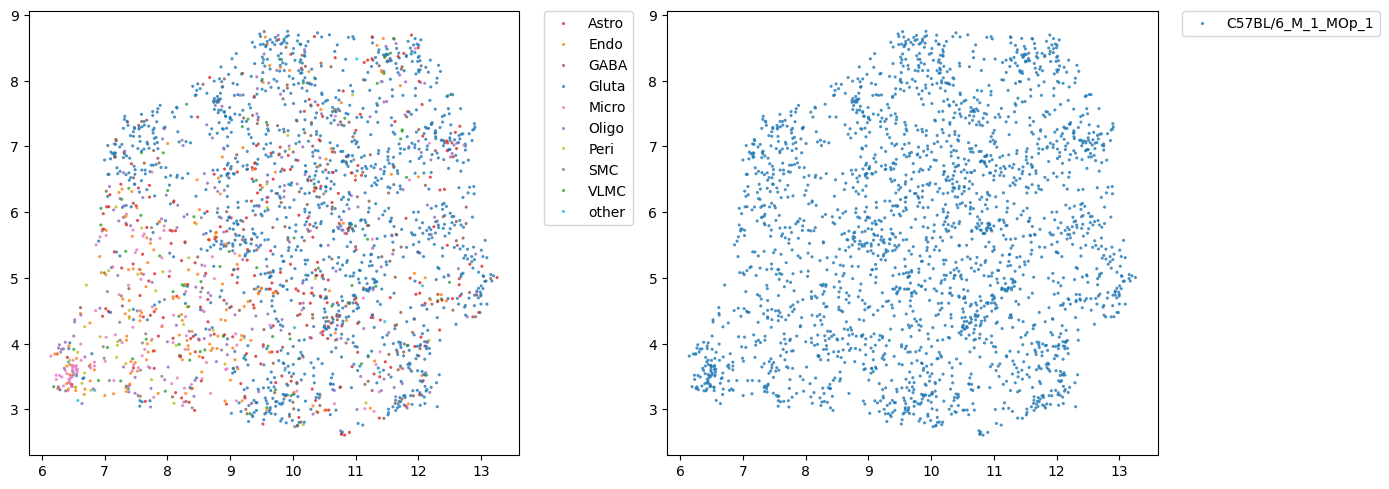

In [39]:
# Visualize initial embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)


vec = UMAP(n_components=2, n_neighbors=5, random_state=0).fit_transform(cell_embeddings)
# cell_type = higashi_model.label_info['cluster_subclass']
cell_type = higashi_model.label_info['cluster_class']
batch = higashi_model.label_info['Sample_ID']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
# sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0,
#                 hue_order=['L2/3 IT', 'Endo', 'VLMC', 'Astro', 'Oligo', 'Sst', 'OPC', 'L5 IT',
#                            'L4/5 IT', 'Vip', 'L5 ET', 'Micro', 'Pvalb', 'L6 IT', 'L6 CT',
#                            'SMC', 'Peri', 'Lamp5', 'L6b', 'L5/6 NP', 'other', 'Sncg'])
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0,
                hue_order=['Gluta', 'Endo', 'VLMC', 'Astro', 'Oligo', 'GABA', 'Micro', 'SMC',
                           'Peri', 'other'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig(f'/n/home09/pren/figures/dnamerfish_pca_umapp_stage1_{tid}.png')
plt.show()


In [40]:
higashi_model.current_device

'cpu'

In [23]:
higashi_model.train_for_imputation_nbr_0()
higashi_model.impute_no_nbr()

Output()

Output()

[12/07/24 04:56:28] INFO     train_for_imputation_no_nbr Second stage training              ]8;id=71578;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=168120;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1668\1668]8;;\

                    INFO     train [ Epoch 0 of 45 ]                                        ]8;id=107430;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=661828;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 04:59:06] INFO     train  - (Train) bce:  0.4283, mse:  0.0000,  acc: 85.398 %,   ]8;id=507811;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=523253;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.543, spearman: 0.506, elapse: 157.899 s                                    

Output()

[12/07/24 04:59:07] INFO     train  - (Valid) bce:  0.3308,  acc: 91.169 %,pearson: 0.681,  ]8;id=218047;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=632873;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.593,elapse: 0.560 s                                                       

                    INFO     train [ Epoch 1 of 45 ]                                        ]8;id=330377;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=770310;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:01:36] INFO     train  - (Train) bce:  0.3376, mse:  0.0000,  acc: 91.095 %,   ]8;id=358919;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=386839;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.589, elapse: 148.690 s                                    

Output()

[12/07/24 05:01:37] INFO     train  - (Valid) bce:  0.3090,  acc: 92.534 %,pearson: 0.736,  ]8;id=514270;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=759467;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.607,elapse: 0.478 s                                                       

                    INFO     train [ Epoch 2 of 45 ]                                        ]8;id=962485;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=949745;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:04:06] INFO     train  - (Train) bce:  0.3199, mse:  0.0000,  acc: 92.454 %,   ]8;id=494432;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=637068;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.721, spearman: 0.602, elapse: 148.717 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2766,  acc: 94.878 %,pearson: 0.779,  ]8;id=389336;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=339512;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.623,elapse: 0.528 s                                                       

                    INFO     train [ Epoch 3 of 45 ]                                        ]8;id=510307;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=857928;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:06:35] INFO     train  - (Train) bce:  0.3075, mse:  0.0000,  acc: 93.387 %,   ]8;id=984649;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=455039;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.744, spearman: 0.610, elapse: 148.442 s                                    

Output()

[12/07/24 05:06:36] INFO     train  - (Valid) bce:  0.2796,  acc: 95.198 %,pearson: 0.791,  ]8;id=40817;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=380604;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.628,elapse: 0.615 s                                                       

                    INFO     train [ Epoch 4 of 45 ]                                        ]8;id=446842;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=42381;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:09:05] INFO     train  - (Train) bce:  0.2982, mse:  0.0000,  acc: 94.053 %,   ]8;id=229547;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=156962;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.760, spearman: 0.616, elapse: 149.677 s                                    

Output()

[12/07/24 05:09:06] INFO     train  - (Valid) bce:  0.2767,  acc: 95.492 %,pearson: 0.795,  ]8;id=447330;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=895465;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.631,elapse: 0.551 s                                                       

                    INFO     train [ Epoch 5 of 45 ]                                        ]8;id=729338;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=444001;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:11:34] INFO     train  - (Train) bce:  0.2901, mse:  0.0000,  acc: 94.590 %,   ]8;id=491235;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=860911;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.775, spearman: 0.620, elapse: 147.721 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2625,  acc: 96.236 %,pearson: 0.816,  ]8;id=986684;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=655427;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.634,elapse: 0.521 s                                                       

[12/07/24 05:11:35] INFO     train [ Epoch 6 of 45 ]                                        ]8;id=514876;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=325849;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:14:04] INFO     train  - (Train) bce:  0.2865, mse:  0.0000,  acc: 94.904 %,   ]8;id=943483;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=219750;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.782, spearman: 0.622, elapse: 149.273 s                                    

Output()

[12/07/24 05:14:05] INFO     train  - (Valid) bce:  0.2572,  acc: 96.421 %,pearson: 0.819,  ]8;id=154355;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=678539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.635,elapse: 0.605 s                                                       

                    INFO     train [ Epoch 7 of 45 ]                                        ]8;id=869587;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=225838;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:16:34] INFO     train  - (Train) bce:  0.2813, mse:  0.0000,  acc: 95.172 %,   ]8;id=388717;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=526256;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.789, spearman: 0.624, elapse: 149.103 s                                    

Output()

[12/07/24 05:16:35] INFO     train  - (Valid) bce:  0.2576,  acc: 96.496 %,pearson: 0.839,  ]8;id=12402;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=969785;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.637,elapse: 0.555 s                                                       

                    INFO     train [ Epoch 8 of 45 ]                                        ]8;id=295373;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=793412;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:19:03] INFO     train  - (Train) bce:  0.2781, mse:  0.0000,  acc: 95.377 %,   ]8;id=205557;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=860084;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.795, spearman: 0.626, elapse: 148.422 s                                    

Output()

[12/07/24 05:19:04] INFO     train  - (Valid) bce:  0.2546,  acc: 97.134 %,pearson: 0.838,  ]8;id=816128;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=677575;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.639,elapse: 0.557 s                                                       

                    INFO     train [ Epoch 9 of 45 ]                                        ]8;id=485756;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=41196;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:21:33] INFO     train  - (Train) bce:  0.2761, mse:  0.0000,  acc: 95.551 %,   ]8;id=46101;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=528336;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.798, spearman: 0.627, elapse: 149.645 s                                    

Output()

[12/07/24 05:21:34] INFO     train  - (Valid) bce:  0.2449,  acc: 97.135 %,pearson: 0.840,  ]8;id=442949;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=132162;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.639,elapse: 0.613 s                                                       

                    INFO     train [ Epoch 10 of 45 ]                                       ]8;id=573109;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=18632;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:24:04] INFO     train  - (Train) bce:  0.2737, mse:  0.0000,  acc: 95.690 %,   ]8;id=892838;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=751946;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.802, spearman: 0.628, elapse: 149.955 s                                    

Output()

[12/07/24 05:24:05] INFO     train  - (Valid) bce:  0.2505,  acc: 97.216 %,pearson: 0.846,  ]8;id=723358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=860316;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.639,elapse: 0.659 s                                                       

                    INFO     train [ Epoch 11 of 45 ]                                       ]8;id=125585;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=211282;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:26:31] INFO     train  - (Train) bce:  0.2724, mse:  0.0000,  acc: 95.797 %,   ]8;id=573027;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=348468;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.804, spearman: 0.629, elapse: 145.544 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2446,  acc: 97.397 %,pearson: 0.845,  ]8;id=236286;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=132198;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.640,elapse: 0.535 s                                                       

                    INFO     train [ Epoch 12 of 45 ]                                       ]8;id=492037;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=13147;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:28:57] INFO     train  - (Train) bce:  0.2711, mse:  0.0000,  acc: 95.879 %,   ]8;id=374525;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=330080;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.807, spearman: 0.630, elapse: 145.494 s                                    

Output()

[12/07/24 05:28:58] INFO     train  - (Valid) bce:  0.2527,  acc: 97.428 %,pearson: 0.840,  ]8;id=563765;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=56537;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.641,elapse: 0.547 s                                                       

                    INFO     train [ Epoch 13 of 45 ]                                       ]8;id=709032;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=967179;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:31:21] INFO     train  - (Train) bce:  0.2686, mse:  0.0000,  acc: 96.004 %,   ]8;id=302188;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=731237;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.811, spearman: 0.631, elapse: 143.696 s                                    

Output()

[12/07/24 05:31:22] INFO     train  - (Valid) bce:  0.2435,  acc: 97.626 %,pearson: 0.851,  ]8;id=366170;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=17786;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.640,elapse: 0.507 s                                                       

                    INFO     train [ Epoch 14 of 45 ]                                       ]8;id=340344;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=505317;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:33:48] INFO     train  - (Train) bce:  0.2673, mse:  0.0000,  acc: 96.049 %,   ]8;id=444085;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=458861;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.812, spearman: 0.631, elapse: 145.997 s                                    

Output()

[12/07/24 05:33:49] INFO     train  - (Valid) bce:  0.2465,  acc: 97.426 %,pearson: 0.849,  ]8;id=84272;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=552583;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.640,elapse: 0.412 s                                                       

                    INFO     train [ Epoch 15 of 45 ]                                       ]8;id=356056;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=53674;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:36:13] INFO     train  - (Train) bce:  0.2658, mse:  0.0000,  acc: 96.158 %,   ]8;id=850488;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=467129;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.815, spearman: 0.632, elapse: 144.182 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2432,  acc: 97.594 %,pearson: 0.852,  ]8;id=567252;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=520038;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.641,elapse: 0.435 s                                                       

[12/07/24 05:36:14] INFO     train [ Epoch 16 of 45 ]                                       ]8;id=757592;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=8782;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:38:38] INFO     train  - (Train) bce:  0.2664, mse:  0.0000,  acc: 96.181 %,   ]8;id=882719;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=495788;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.816, spearman: 0.632, elapse: 143.959 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2337,  acc: 97.873 %,pearson: 0.863,  ]8;id=878915;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=16354;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.411 s                                                       

                    INFO     train no improve: 1                                            ]8;id=246948;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=381157;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 17 of 45 ]                                       ]8;id=745711;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=988630;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:41:04] INFO     train  - (Train) bce:  0.2655, mse:  0.0000,  acc: 96.230 %,   ]8;id=937881;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=932699;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.816, spearman: 0.632, elapse: 145.233 s                                    

Output()

[12/07/24 05:41:05] INFO     train  - (Valid) bce:  0.2417,  acc: 97.663 %,pearson: 0.851,  ]8;id=137213;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=320299;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.601 s                                                       

                    INFO     train no improve: 2                                            ]8;id=828781;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=802100;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 18 of 45 ]                                       ]8;id=233739;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=139159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:43:28] INFO     train  - (Train) bce:  0.2637, mse:  0.0000,  acc: 96.293 %,   ]8;id=690468;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=890055;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.820, spearman: 0.633, elapse: 143.705 s                                    

Output()

[12/07/24 05:43:29] INFO     train  - (Valid) bce:  0.2348,  acc: 97.944 %,pearson: 0.863,  ]8;id=684138;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=468936;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.419 s                                                       

                    INFO     train [ Epoch 19 of 45 ]                                       ]8;id=353721;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=973370;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:45:55] INFO     train  - (Train) bce:  0.2632, mse:  0.0000,  acc: 96.346 %,   ]8;id=868784;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=407307;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.819, spearman: 0.633, elapse: 146.250 s                                    

Output()

[12/07/24 05:45:56] INFO     train  - (Valid) bce:  0.2384,  acc: 97.854 %,pearson: 0.858,  ]8;id=517296;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=537589;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.657 s                                                       

                    INFO     train no improve: 1                                            ]8;id=775211;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=28392;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 20 of 45 ]                                       ]8;id=446177;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=334213;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:48:19] INFO     train  - (Train) bce:  0.2628, mse:  0.0000,  acc: 96.351 %,   ]8;id=659081;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=899698;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.820, spearman: 0.633, elapse: 143.121 s                                    

Output()

[12/07/24 05:48:20] INFO     train  - (Valid) bce:  0.2367,  acc: 97.816 %,pearson: 0.861,  ]8;id=917749;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=117826;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.579 s                                                       

                    INFO     train no improve: 2                                            ]8;id=613302;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=392177;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 21 of 45 ]                                       ]8;id=307966;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=487121;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:50:43] INFO     train  - (Train) bce:  0.2615, mse:  0.0000,  acc: 96.430 %,   ]8;id=648662;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=125011;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.823, spearman: 0.633, elapse: 142.844 s                                    

Output()

[12/07/24 05:50:44] INFO     train  - (Valid) bce:  0.2324,  acc: 98.184 %,pearson: 0.867,  ]8;id=996159;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=421874;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.644,elapse: 0.446 s                                                       

                    INFO     train [ Epoch 22 of 45 ]                                       ]8;id=152555;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=43052;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:53:09] INFO     train  - (Train) bce:  0.2606, mse:  0.0000,  acc: 96.528 %,   ]8;id=681382;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=981685;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.823, spearman: 0.634, elapse: 144.878 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2313,  acc: 98.094 %,pearson: 0.858,  ]8;id=655692;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=78534;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.578 s                                                       

                    INFO     train no improve: 1                                            ]8;id=894006;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=863054;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 23 of 45 ]                                       ]8;id=244259;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=576507;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:55:33] INFO     train  - (Train) bce:  0.2603, mse:  0.0000,  acc: 96.511 %,   ]8;id=789915;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=292834;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.825, spearman: 0.634, elapse: 143.378 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2372,  acc: 97.897 %,pearson: 0.856,  ]8;id=283392;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=333796;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.485 s                                                       

[12/07/24 05:55:34] INFO     train [ Epoch 24 of 45 ]                                       ]8;id=412653;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=236854;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 05:57:58] INFO     train  - (Train) bce:  0.2602, mse:  0.0000,  acc: 96.536 %,   ]8;id=913053;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=92765;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.824, spearman: 0.634, elapse: 144.420 s                                    

Output()

[12/07/24 05:57:59] INFO     train  - (Valid) bce:  0.2374,  acc: 97.790 %,pearson: 0.861,  ]8;id=555271;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=267262;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.642,elapse: 0.558 s                                                       

                    INFO     train no improve: 1                                            ]8;id=29151;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=36568;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 25 of 45 ]                                       ]8;id=450816;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=154622;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:00:22] INFO     train  - (Train) bce:  0.2592, mse:  0.0000,  acc: 96.559 %,   ]8;id=422883;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=877649;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.825, spearman: 0.634, elapse: 143.577 s                                    

Output()

[12/07/24 06:00:23] INFO     train  - (Valid) bce:  0.2393,  acc: 98.029 %,pearson: 0.862,  ]8;id=557849;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=366258;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.578 s                                                       

                    INFO     train [ Epoch 26 of 45 ]                                       ]8;id=740247;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=926296;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:02:47] INFO     train  - (Train) bce:  0.2592, mse:  0.0000,  acc: 96.619 %,   ]8;id=627714;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=898715;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.826, spearman: 0.635, elapse: 143.672 s                                    

Output()

[12/07/24 06:02:48] INFO     train  - (Valid) bce:  0.2301,  acc: 98.003 %,pearson: 0.871,  ]8;id=533349;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=234885;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.625 s                                                       

                    INFO     train no improve: 1                                            ]8;id=271306;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=984317;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 27 of 45 ]                                       ]8;id=624211;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=707383;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:05:11] INFO     train  - (Train) bce:  0.2589, mse:  0.0000,  acc: 96.615 %,   ]8;id=292156;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=442277;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.826, spearman: 0.635, elapse: 143.316 s                                    

Output()

[12/07/24 06:05:12] INFO     train  - (Valid) bce:  0.2331,  acc: 97.906 %,pearson: 0.862,  ]8;id=662469;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=958244;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.501 s                                                       

                    INFO     train no improve: 2                                            ]8;id=975063;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=134326;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 28 of 45 ]                                       ]8;id=340447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=440983;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:07:36] INFO     train  - (Train) bce:  0.2594, mse:  0.0000,  acc: 96.627 %,   ]8;id=283423;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=294320;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.827, spearman: 0.635, elapse: 143.709 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2316,  acc: 98.148 %,pearson: 0.871,  ]8;id=525952;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=627643;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.454 s                                                       

                    INFO     train no improve: 3                                            ]8;id=365026;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=992275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 29 of 45 ]                                       ]8;id=961846;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=134207;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:10:03] INFO     train  - (Train) bce:  0.2582, mse:  0.0000,  acc: 96.700 %,   ]8;id=891628;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=50868;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.828, spearman: 0.635, elapse: 146.265 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.2335,  acc: 98.162 %,pearson: 0.865,  ]8;id=712910;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=886715;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.643,elapse: 0.488 s                                                       

Output()

[12/07/24 06:10:08] INFO     train  - (Validation-hyper) bce:  0.2392,  acc: 98.103 %, auc: ]8;id=254604;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=749030;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1328\1328]8;;\
                             0.855, aupr: 0.643,elapse: 4.474 s                                                    

[12/07/24 06:12:07] INFO     impute_process Total number of triplets to predict: (29391, 3)           ]8;id=656363;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=956909;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#223\223]8;;\

Output()

[12/07/24 06:14:46] INFO     impute_process Finished imputing, took 158.85 s                          ]8;id=93742;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=283518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#263\263]8;;\

In [24]:
higashi_model.train_for_imputation_with_nbr()
higashi_model.impute_with_nbr()

Output()

Output()

[12/07/24 06:14:47] INFO     train_for_imputation_with_nbr getting cell nbr's nbr list      ]8;id=115497;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=704640;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1749\1749]8;;\

                    INFO     train_for_imputation_with_nbr Cell neighbors (first 10):       ]8;id=50502;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=564362;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1757\1757]8;;\
                             cell_neighbor_list[:10]=array([[   0,    0,    0,    0,    0,                         
                             0],                                                                                   
                                    [   1, 2015,  947, 2403, 1199,  703],                                          
                                    [   2,  123,  427,  729,  751, 1554],                                          
                                    [   3, 1972, 2313, 1864, 1116, 1207],                                          
                                    [   4, 1857,  260, 2122, 1694,  349],                                          
                                    [   5, 1467,  572, 1382,  999,  893],                                          
                                    [   6, 2057, 1662,  774, 1724,  986],                                          
                                    [   7, 2337, 1110, 2149,   77,  290],                                          
                                    [   8,   30,  967,  325, 1023,  592],                                          
                                    [   9,  871,  592, 1544,  526,  236]])                                         
                             cell_neighbor_weight_list[:10]=array([[0.        , 0.        ,                        
                             0.        , 0.        , 0.        ,                                                   
                                     0.        ],                                                                  
                                    [0.55629605, 0.09481202, 0.08820672, 0.08770368,                               
                             0.08672086,                                                                           
                                     0.08626066],                                                                  
                                    [0.54707871, 0.09764683, 0.09122977, 0.09119003,                               
                             0.08817615,                                                                           
                                     0.08467851],                                                                  
                                    [0.28823253, 0.14949078, 0.14691475, 0.13929884,                               
                             0.13899803,                                                                           
                                     0.13706506],                                                                  
                                    [0.62502264, 0.07924382, 0.07592922, 0.07411628,                               
                             0.07350144,                                                                           
                                     0.0721866 ],                                                                  
                                    [0.43710929, 0.11608927, 0.11361972, 0.11250892,                               
                             0.11087869,                                                                           
                                     0.10979412],                                                                  
                                    [0.45618088, 0.11086524, 0.11085676, 0.107665  ,                               
                             0.10723363,                                                                           
                                     0.1071985 ],                                 

[12/07/24 06:15:12] INFO     train_for_imputation_with_nbr Final stage training             ]8;id=459616;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=481811;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1788\1788]8;;\

                    INFO     train [ Epoch 0 of 30 ]                                        ]8;id=594272;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=634219;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:17:51] INFO     train  - (Train) bce:  0.5209, mse:  0.0000,  acc: 82.405 %,   ]8;id=780621;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=876267;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.401, spearman: 0.374, elapse: 158.895 s                                    

Output()

[12/07/24 06:17:52] INFO     train  - (Valid) bce:  0.4893,  acc: 84.355 %,pearson: 0.429,  ]8;id=144804;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=841267;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.414,elapse: 0.468 s                                                       

                    INFO     train [ Epoch 1 of 30 ]                                        ]8;id=369255;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=521937;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:20:27] INFO     train  - (Train) bce:  0.4754, mse:  0.0000,  acc: 83.186 %,   ]8;id=120015;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=999580;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.463, spearman: 0.429, elapse: 154.431 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.4571,  acc: 84.178 %,pearson: 0.487,  ]8;id=367249;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=104281;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.448,elapse: 0.597 s                                                       

                    INFO     train [ Epoch 2 of 30 ]                                        ]8;id=304316;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=516828;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:22:59] INFO     train  - (Train) bce:  0.4564, mse:  0.0000,  acc: 83.614 %,   ]8;id=493666;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=134126;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.491, spearman: 0.453, elapse: 151.321 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.4305,  acc: 85.538 %,pearson: 0.545,  ]8;id=657331;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=386888;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.480,elapse: 0.437 s                                                       

                    INFO     train [ Epoch 3 of 30 ]                                        ]8;id=282424;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=172113;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:25:31] INFO     train  - (Train) bce:  0.4384, mse:  0.0000,  acc: 84.577 %,   ]8;id=147015;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=10567;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.533, spearman: 0.481, elapse: 151.212 s                                    

Output()

[12/07/24 06:25:32] INFO     train  - (Valid) bce:  0.4140,  acc: 86.358 %,pearson: 0.577,  ]8;id=60628;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=454004;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.501,elapse: 0.663 s                                                       

                    INFO     train [ Epoch 4 of 30 ]                                        ]8;id=783012;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=428802;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:28:06] INFO     train  - (Train) bce:  0.4175, mse:  0.0000,  acc: 85.786 %,   ]8;id=183049;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=484162;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.575, spearman: 0.506, elapse: 154.233 s                                    

Output()

[12/07/24 06:28:07] INFO     train  - (Valid) bce:  0.4031,  acc: 86.371 %,pearson: 0.603,  ]8;id=212926;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=542082;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.521,elapse: 0.531 s                                                       

                    INFO     train [ Epoch 5 of 30 ]                                        ]8;id=838945;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=569504;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:30:38] INFO     train  - (Train) bce:  0.4071, mse:  0.0000,  acc: 86.604 %,   ]8;id=439849;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=982396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.599, spearman: 0.520, elapse: 150.910 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3991,  acc: 88.877 %,pearson: 0.679,  ]8;id=269820;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=981080;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.559,elapse: 0.483 s                                                       

[12/07/24 06:30:39] INFO     train [ Epoch 6 of 30 ]                                        ]8;id=809268;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=420978;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:33:14] INFO     train  - (Train) bce:  0.3976, mse:  0.0000,  acc: 87.248 %,   ]8;id=496489;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=581998;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.619, spearman: 0.531, elapse: 154.591 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3852,  acc: 88.740 %,pearson: 0.675,  ]8;id=65225;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=391955;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.553,elapse: 0.509 s                                                       

                    INFO     train [ Epoch 7 of 30 ]                                        ]8;id=141084;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=345160;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:35:45] INFO     train  - (Train) bce:  0.3939, mse:  0.0000,  acc: 87.541 %,   ]8;id=138469;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=780691;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.625, spearman: 0.534, elapse: 151.041 s                                    

Output()

[12/07/24 06:35:46] INFO     train  - (Valid) bce:  0.3619,  acc: 88.761 %,pearson: 0.675,  ]8;id=218755;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=308795;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.557,elapse: 0.659 s                                                       

                    INFO     train [ Epoch 8 of 30 ]                                        ]8;id=118996;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=966723;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:38:18] INFO     train  - (Train) bce:  0.3864, mse:  0.0000,  acc: 88.047 %,   ]8;id=770386;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=129479;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.639, spearman: 0.543, elapse: 151.536 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3652,  acc: 89.052 %,pearson: 0.695,  ]8;id=313610;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=319399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.559,elapse: 0.514 s                                                       

                    INFO     train [ Epoch 9 of 30 ]                                        ]8;id=820378;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=157200;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:40:50] INFO     train  - (Train) bce:  0.3813, mse:  0.0000,  acc: 88.325 %,   ]8;id=968943;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=508814;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.647, spearman: 0.548, elapse: 151.474 s                                    

Output()

[12/07/24 06:40:51] INFO     train  - (Valid) bce:  0.3502,  acc: 89.616 %,pearson: 0.686,  ]8;id=301748;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=47799;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.570,elapse: 0.622 s                                                       

                    INFO     train [ Epoch 10 of 30 ]                                       ]8;id=910895;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=217399;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:43:22] INFO     train  - (Train) bce:  0.3781, mse:  0.0000,  acc: 88.499 %,   ]8;id=200753;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=788786;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.652, spearman: 0.550, elapse: 150.645 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3565,  acc: 89.296 %,pearson: 0.696,  ]8;id=288168;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=28893;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.563,elapse: 0.524 s                                                       

[12/07/24 06:43:23] INFO     train [ Epoch 11 of 30 ]                                       ]8;id=242737;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=207881;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:45:53] INFO     train  - (Train) bce:  0.3745, mse:  0.0000,  acc: 88.780 %,   ]8;id=350936;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=310076;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.658, spearman: 0.554, elapse: 149.933 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3471,  acc: 90.185 %,pearson: 0.712,  ]8;id=130167;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=335;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.581,elapse: 0.650 s                                                       

                    INFO     train [ Epoch 12 of 30 ]                                       ]8;id=116158;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=789447;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:48:24] INFO     train  - (Train) bce:  0.3723, mse:  0.0000,  acc: 89.010 %,   ]8;id=234028;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=719021;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.662, spearman: 0.558, elapse: 149.934 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3395,  acc: 90.217 %,pearson: 0.713,  ]8;id=33388;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=340381;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.577,elapse: 0.504 s                                                       

                    INFO     train [ Epoch 13 of 30 ]                                       ]8;id=848185;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=32407;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:50:55] INFO     train  - (Train) bce:  0.3699, mse:  0.0000,  acc: 89.098 %,   ]8;id=540518;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=357358;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.666, spearman: 0.559, elapse: 151.236 s                                    

Output()

[12/07/24 06:50:56] INFO     train  - (Valid) bce:  0.3569,  acc: 90.504 %,pearson: 0.700,  ]8;id=604455;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=33676;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.580,elapse: 0.457 s                                                       

                    INFO     train [ Epoch 14 of 30 ]                                       ]8;id=569001;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=708299;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:53:26] INFO     train  - (Train) bce:  0.3663, mse:  0.0000,  acc: 89.327 %,   ]8;id=195045;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=702132;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.672, spearman: 0.562, elapse: 149.636 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3424,  acc: 90.405 %,pearson: 0.705,  ]8;id=126146;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=830322;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.576,elapse: 0.528 s                                                       

                    INFO     train [ Epoch 15 of 30 ]                                       ]8;id=469724;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=850380;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:55:57] INFO     train  - (Train) bce:  0.3635, mse:  0.0000,  acc: 89.539 %,   ]8;id=848199;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=833410;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.678, spearman: 0.565, elapse: 150.286 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3355,  acc: 91.162 %,pearson: 0.709,  ]8;id=232478;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=189391;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.544 s                                                       

[12/07/24 06:55:58] INFO     train [ Epoch 16 of 30 ]                                       ]8;id=329254;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=163605;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 06:58:28] INFO     train  - (Train) bce:  0.3619, mse:  0.0000,  acc: 89.661 %,   ]8;id=126887;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=409951;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.679, spearman: 0.567, elapse: 149.942 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3389,  acc: 91.282 %,pearson: 0.727,  ]8;id=888444;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=721211;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.591,elapse: 0.725 s                                                       

[12/07/24 06:58:29] INFO     train [ Epoch 17 of 30 ]                                       ]8;id=369172;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=311734;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:00:58] INFO     train  - (Train) bce:  0.3600, mse:  0.0000,  acc: 89.776 %,   ]8;id=489780;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=688976;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.682, spearman: 0.568, elapse: 149.788 s                                    

Output()

[12/07/24 07:00:59] INFO     train  - (Valid) bce:  0.3482,  acc: 89.879 %,pearson: 0.714,  ]8;id=645540;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=734490;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.579,elapse: 0.548 s                                                       

                    INFO     train [ Epoch 18 of 30 ]                                       ]8;id=685498;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=529943;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:03:31] INFO     train  - (Train) bce:  0.3571, mse:  0.0000,  acc: 89.982 %,   ]8;id=73220;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=783039;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.687, spearman: 0.571, elapse: 152.245 s                                    

Output()

[12/07/24 07:03:32] INFO     train  - (Valid) bce:  0.3390,  acc: 90.588 %,pearson: 0.710,  ]8;id=23617;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=87931;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.587,elapse: 0.460 s                                                       

                    INFO     train [ Epoch 19 of 30 ]                                       ]8;id=781943;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=465281;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:06:04] INFO     train  - (Train) bce:  0.3575, mse:  0.0000,  acc: 89.935 %,   ]8;id=907962;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=298415;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.687, spearman: 0.571, elapse: 151.654 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3413,  acc: 90.316 %,pearson: 0.708,  ]8;id=589227;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=722875;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.583,elapse: 0.486 s                                                       

                    INFO     train no improve: 1                                            ]8;id=240337;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=242441;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 20 of 30 ]                                       ]8;id=117661;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=175539;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:08:35] INFO     train  - (Train) bce:  0.3547, mse:  0.0000,  acc: 90.104 %,   ]8;id=274448;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=242396;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.690, spearman: 0.573, elapse: 150.213 s                                    

Output()

[12/07/24 07:08:36] INFO     train  - (Valid) bce:  0.3306,  acc: 91.795 %,pearson: 0.731,  ]8;id=89143;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=590489;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.595,elapse: 0.716 s                                                       

                    INFO     train [ Epoch 21 of 30 ]                                       ]8;id=382910;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=22977;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:11:05] INFO     train  - (Train) bce:  0.3529, mse:  0.0000,  acc: 90.226 %,   ]8;id=685040;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=639995;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.695, spearman: 0.575, elapse: 149.224 s                                    

Output()

[12/07/24 07:11:06] INFO     train  - (Valid) bce:  0.3331,  acc: 91.672 %,pearson: 0.733,  ]8;id=451494;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=84207;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.596,elapse: 0.358 s                                                       

                    INFO     train [ Epoch 22 of 30 ]                                       ]8;id=814645;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=562873;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:13:38] INFO     train  - (Train) bce:  0.3519, mse:  0.0000,  acc: 90.283 %,   ]8;id=784096;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=38705;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.696, spearman: 0.575, elapse: 151.468 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3355,  acc: 91.623 %,pearson: 0.737,  ]8;id=982506;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=689897;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.592,elapse: 0.548 s                                                       

                    INFO     train [ Epoch 23 of 30 ]                                       ]8;id=200394;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=128231;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:16:11] INFO     train  - (Train) bce:  0.3503, mse:  0.0000,  acc: 90.417 %,   ]8;id=7521;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=839286;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.700, spearman: 0.577, elapse: 152.548 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3232,  acc: 92.031 %,pearson: 0.746,  ]8;id=476230;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=911144;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.600,elapse: 0.281 s                                                       

                    INFO     train [ Epoch 24 of 30 ]                                       ]8;id=634417;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=535393;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:18:42] INFO     train  - (Train) bce:  0.3506, mse:  0.0000,  acc: 90.403 %,   ]8;id=837600;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=402921;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.698, spearman: 0.576, elapse: 151.033 s                                    

Output()

[12/07/24 07:18:43] INFO     train  - (Valid) bce:  0.3274,  acc: 91.757 %,pearson: 0.735,  ]8;id=421504;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=329697;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.596,elapse: 0.572 s                                                       

                    INFO     train no improve: 1                                            ]8;id=644531;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=934638;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 25 of 30 ]                                       ]8;id=517687;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=926954;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:21:14] INFO     train  - (Train) bce:  0.3470, mse:  0.0000,  acc: 90.574 %,   ]8;id=404673;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=166074;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.703, spearman: 0.579, elapse: 150.338 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3161,  acc: 92.305 %,pearson: 0.743,  ]8;id=519263;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=106702;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.601,elapse: 0.552 s                                                       

                    INFO     train [ Epoch 26 of 30 ]                                       ]8;id=545747;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=741982;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:23:47] INFO     train  - (Train) bce:  0.3474, mse:  0.0000,  acc: 90.611 %,   ]8;id=177565;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=24492;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.703, spearman: 0.580, elapse: 152.270 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3233,  acc: 92.151 %,pearson: 0.731,  ]8;id=690916;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=524521;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.597,elapse: 0.538 s                                                       

                    INFO     train no improve: 1                                            ]8;id=71774;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=610028;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

                    INFO     train [ Epoch 27 of 30 ]                                       ]8;id=388261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=868204;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:26:17] INFO     train  - (Train) bce:  0.3453, mse:  0.0000,  acc: 90.663 %,   ]8;id=396025;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=120933;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.706, spearman: 0.580, elapse: 149.462 s                                    

Output()

[12/07/24 07:26:18] INFO     train  - (Valid) bce:  0.3349,  acc: 91.551 %,pearson: 0.730,  ]8;id=270966;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=760760;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.593,elapse: 0.506 s                                                       

                    INFO     train [ Epoch 28 of 30 ]                                       ]8;id=550191;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=345223;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:28:50] INFO     train  - (Train) bce:  0.3437, mse:  0.0000,  acc: 90.809 %,   ]8;id=961306;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=832581;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.709, spearman: 0.582, elapse: 152.087 s                                    

Output()

[12/07/24 07:28:51] INFO     train  - (Valid) bce:  0.3205,  acc: 92.694 %,pearson: 0.752,  ]8;id=375679;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=414879;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.602,elapse: 0.656 s                                                       

                    INFO     train [ Epoch 29 of 30 ]                                       ]8;id=932704;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=786838;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1245\1245]8;;\

Output()

[12/07/24 07:31:21] INFO     train  - (Train) bce:  0.3440, mse:  0.0000,  acc: 90.762 %,   ]8;id=726442;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=346800;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1258\1258]8;;\
                             pearson: 0.708, spearman: 0.582, elapse: 150.060 s                                    

Output()

                    INFO     train  - (Valid) bce:  0.3212,  acc: 91.926 %,pearson: 0.747,  ]8;id=223889;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=449892;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1277\1277]8;;\
                             spearman: 0.597,elapse: 0.479 s                                                       

                    INFO     train no improve: 1                                            ]8;id=95194;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=937691;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1323\1323]8;;\

Output()

[12/07/24 07:31:26] INFO     train  - (Validation-hyper) bce:  0.3253,  acc: 91.944 %, auc: ]8;id=927444;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=791761;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1328\1328]8;;\
                             0.739, aupr: 0.596,elapse: 4.684 s                                                    

[12/07/24 07:33:32] INFO     impute_process Total number of triplets to predict: (29391, 3)           ]8;id=988069;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=689261;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#223\223]8;;\

Output()

[12/07/24 07:36:36] INFO     impute_process Finished imputing, took 184.09 s                          ]8;id=878357;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py\Impute.py]8;;\:]8;id=525796;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Impute.py#263\263]8;;\

(2413, 100)


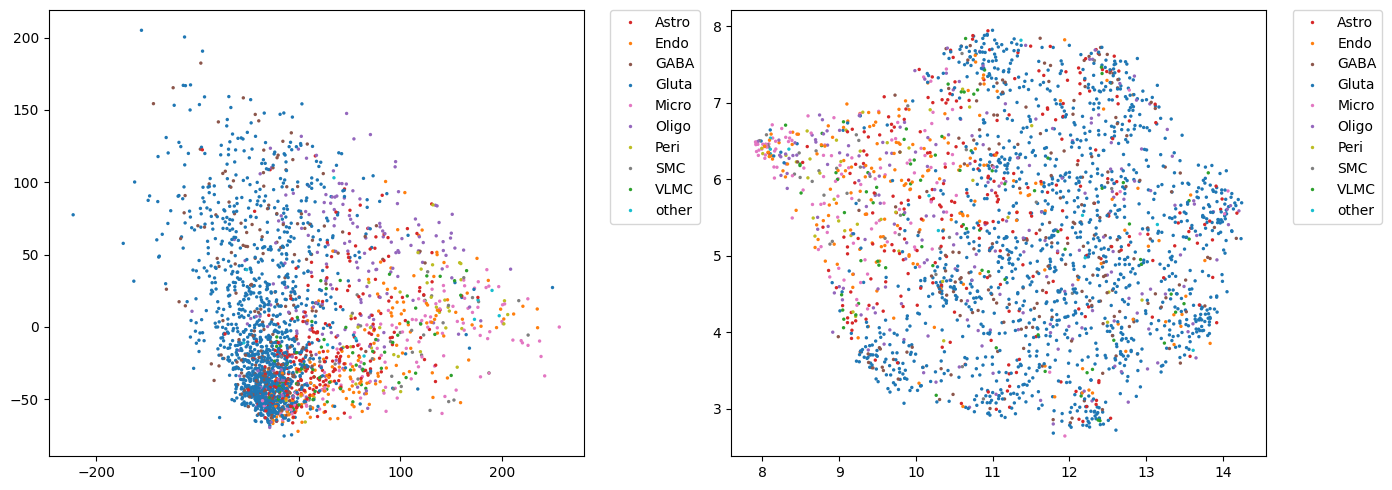

In [41]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['cluster_class']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig(f'/n/home09/pren/figures/dnamerfish_pca_umapp_{tid}.png')
plt.show()

(2413, 100)


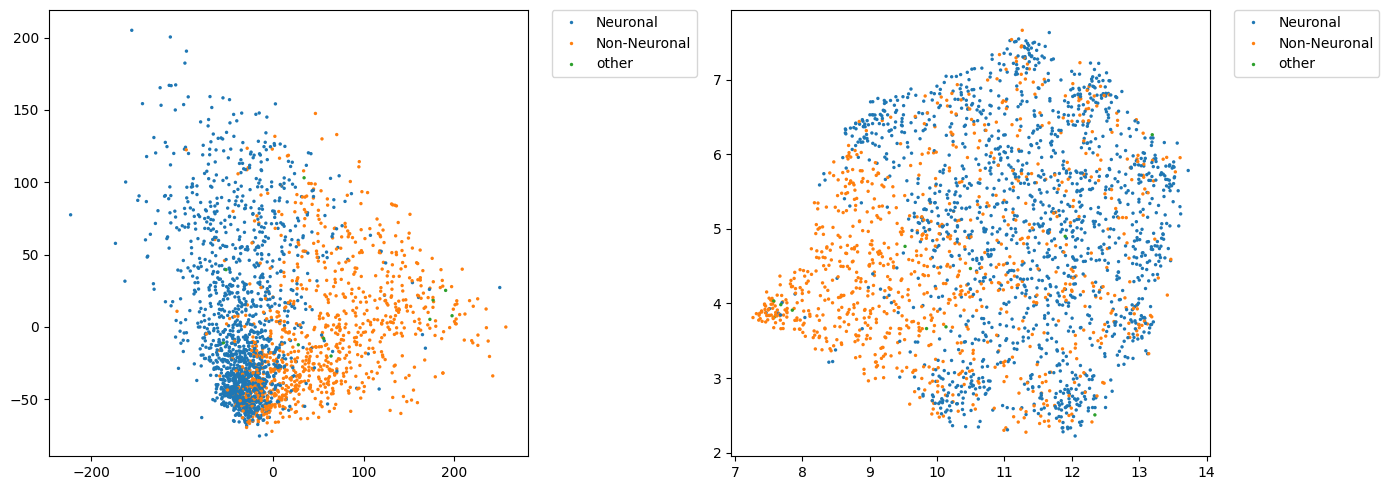

In [42]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['neuron_identity']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig(f'/n/home09/pren/figures/dnamerfish_pca_umapp_neuronlabels_{tid}.png')
plt.show()

[12/07/24 15:20:49] INFO     fetch_cell_embeddings Loading from last training results       ]8;id=808115;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py\Higashi_wrapper.py]8;;\:]8;id=226275;file:///n/home09/pren/3DGeno_tools/src/gt3d/modules/higashi/Higashi_wrapper.py#1841\1841]8;;\

(2413, 100)


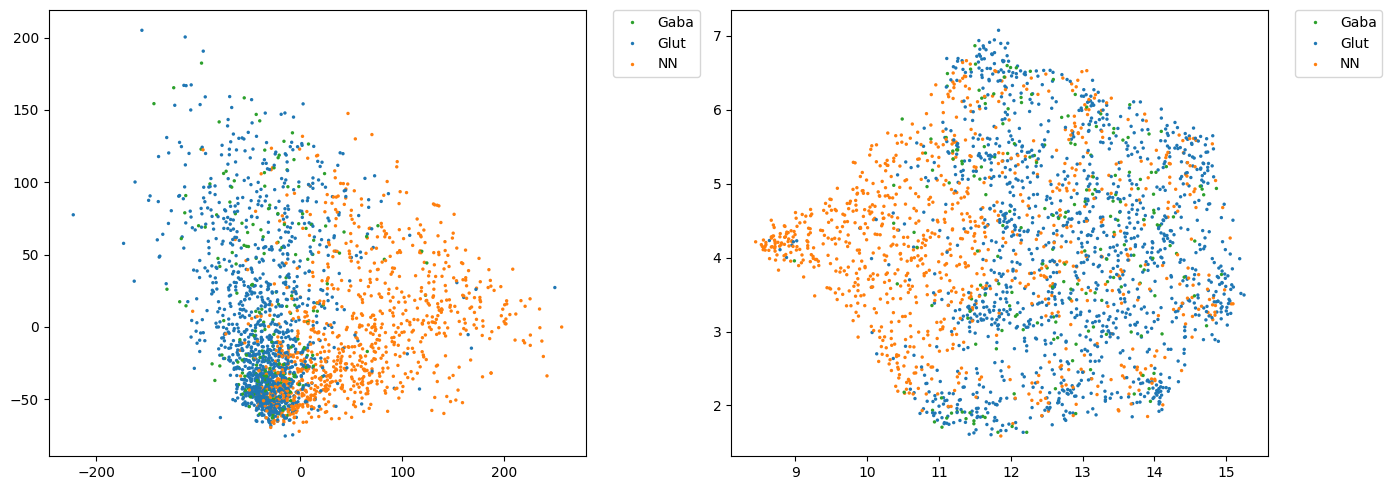

In [50]:
# Visualize final embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from sklearn.decomposition import PCA

cell_type = higashi_model.label_info['NeuroTransmitters']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
vec = PCA(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
vec = UMAP(n_components=2).fit_transform(cell_embeddings)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=6, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.savefig(f'/n/home09/pren/figures/dnamerfish_pca_umapp_neurotransmitter_labels_{tid}.png')
plt.show()

In [66]:
def split_name(name):
  chrom, chrom_start_end = name.split(':')
  chrom_start, chrom_end = chrom_start_end.split('-')
  return pd.Series([chrom, chrom_start, chrom_end], index=['Chrom', 'Chrom_Start', 'Chrom_End'])

In [67]:
codebook_df = pd.read_csv(os.path.join(libraries_path, 'ctp11_wholemouse/CTP11-1000_codebook_probe.csv'))
codebook_df[['Chrom', 'Chrom_Start', 'Chrom_End']] = codebook_df['name'].apply(split_name)
codebook_ref_df = codebook_df[['Chrom', 'Chrom_Start', 'Chrom_End', 'chr_order']]
codebook_ref_df = codebook_ref_df.rename(columns={'chr_order': 'Chrom_order'})
codebook_ref_df['Chrom'] = codebook_ref_df['Chrom'].map(lambda x: f'chr{x}')
codebook_ref_df = codebook_ref_df.astype({'Chrom_Start': 'int64', 'Chrom_End': 'int64', 'Chrom_order': 'int64'})
codebook_ref_df

Chrom  Chrom_Start  Chrom_End  Chrom_order
0    chr1      3742742    3759944            0
1    chr1      6245958    6258969            1
2    chr1      8740008    8759916            2
3    chr1     11247744   11257616            3
4    chr1     13741888   13757922            4
..    ...          ...        ...          ...
983  chrX    161247067  161259813           52
984  chrX    163750534  163758706           53
985  chrX    166247682  166259932           54
986  chrX    168746045  168757590           55
987  chrY      1245775    1259992            0

[988 rows x 4 columns]

In [55]:
def fetch_map(higashi_model, chrom, cell):
    c = higashi_model.chrom_list.index(chrom)
    s, e = higashi_model.chrom_start_end[c]
    size = e - s
    try:
        with h5py.File(osp.join(higashi_model.temp_dir, "%s_%s_nbr_%d_impute.hdf5" % (chrom, higashi_model.embedding_name, 0)), "r") as f:
            coordinates = np.array(f['coordinates']).astype('int')
            p = np.array(f["cell_%d" % cell])

            m1 = csr_matrix((p, (coordinates[:, 0], coordinates[:, 1])), shape=(size, size), dtype='float32')
            m1 = m1 + m1.T
    except Exception as e:
        m1 = np.zeros((size, size))
        # logger.warning(f"No 0 nbr imputation for {chrom} {cell:,} ({e})")

    try:
        with h5py.File(osp.join(higashi_model.temp_dir, "%s_%s_nbr_%d_impute.hdf5" % (chrom, higashi_model.embedding_name, higashi_model.neighbor_num - 1)), "r") as f:
            coordinates = np.array(f['coordinates']).astype('int')
            p = np.array(f["cell_%d" % cell])

            m2 = csr_matrix((p, (coordinates[:, 0], coordinates[:, 1])), shape=(size, size), dtype='float32')
            m2 = m2 + m2.T
    except Exception as e:
        m2 = np.zeros((size, size))
        # logger.warning(f"No {higashi_model.neighbors_num} nbr imputation for {chrom} {cell:,} ({e})")

    if chrom not in higashi_model.ori_sparse_list:
        higashi_model.ori_sparse_list[chrom] = np.load(osp.join(
            higashi_model.temp_dir, "raw", "%s_sparse_adj.npy" % chrom), allow_pickle=True)

    m3 = higashi_model.ori_sparse_list[chrom][cell]

    return m3, m1, m2
    

In [84]:
def find_closest_index_np(lst, query):
    array = np.array(lst)
    idx = (np.abs(array - query)).argmin()
    return idx

In [95]:
def fetch_dist_map(filelist, chrom, cell, codebook_ref_df, dists_path):
    with open(filelist, 'r') as f:
        files = [line.rstrip('\n') for line in f]
        cell_dist_filename = files[cell]
        cell_id = re.search('cell\d+', cell_dist_filename).group()[4:]
        pattern = osp.join(dists_path, f'dist_cell{cell_id}_ord*.txt')
        dist_filename = glob.glob(pattern)[0]
        # dist_filename = osp.join(dists_path, f'dist_cell{cell_id}_ord{cell}.txt')
        print(f'Loading file {dist_filename}...')
        dist_df = pd.read_csv(dist_filename, sep='\t')
        dist_chr_df = dist_df[dist_df['chrom1'] == chrom]
    codebook_ref_chr_df = codebook_ref_df[codebook_ref_df['Chrom'] == chrom]
    codebook_ref_chr_df["med_pos"] = ((codebook_ref_chr_df["Chrom_Start"] + codebook_ref_chr_df["Chrom_End"])/2).astype(int)
    # print(codebook_ref_chr_df)
    chrom_positions = list(codebook_ref_chr_df['med_pos'])
    dim = len(chrom_positions)
    dist_mat = np.zeros(shape=(dim, dim))
    for _, row in dist_chr_df.iterrows():
        pos1_idx = find_closest_index_np(chrom_positions, row['pos1'])
        pos2_idx = find_closest_index_np(chrom_positions, row['pos2'])
        dist_mat[pos1_idx, pos2_idx] = row['distance']
    dist_mat = dist_mat + dist_mat.T - np.diag(dist_mat.diagonal())
    return dist_mat

        
dist_mat_test = fetch_dist_map(osp.join(filelist_path, 'filelist.txt'), 'chr3', 1, codebook_ref_df, dists_path)        


Loading file /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/multiplexed_fish/merfish_dists/dist_cell100444929727335622562402977796883679092_ord1700_data.txt...


In [96]:
print('dist_mat_test.shape: ', dist_mat_test.shape)


dist_mat_test.shape:  (61, 61)


In [97]:
ori_test, nbr0_test, nbr5_test = fetch_map(higashi_model, 'chr3', 1)
print('ori_test.shape: ', ori_test.shape)
print('nbr0_test.shape: ', nbr0_test.shape)
print('nbr5_test.shape: ', nbr5_test.shape)



ori_test.shape:  (65, 65)
nbr0_test.shape:  (65, 65)
nbr5_test.shape:  (65, 65)


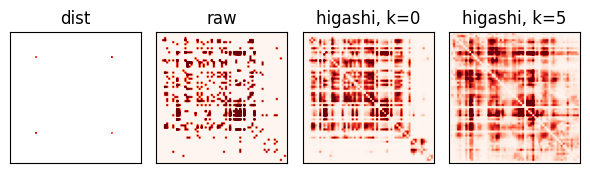

In [98]:
fig = plt.figure(figsize=(6, 2*1))

ax = plt.subplot(1, 4, 1)
ax.imshow(dist_mat_test, cmap='Reds', vmin=0.0)#, vmax=np.quantile(dist_mat_test, 0.6))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title("dist")
# ax.set_ylabel(f'Cell {id_}')

ax = plt.subplot(1, 4, 2)
ax.imshow(ori_test.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori_test.data, 0.6))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title("raw")
# ax.set_ylabel(f'Cell {id_}')


ax = plt.subplot(1, 4, 3)
ax.imshow(nbr0_test.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0_test.data, 0.95))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title("higashi, k=0")

ax = plt.subplot(1, 4, 4)
ax.imshow(nbr5_test.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5_test.data, 0.95))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title("higashi, k=5")

plt.tight_layout()

plt.show()
plt.close()

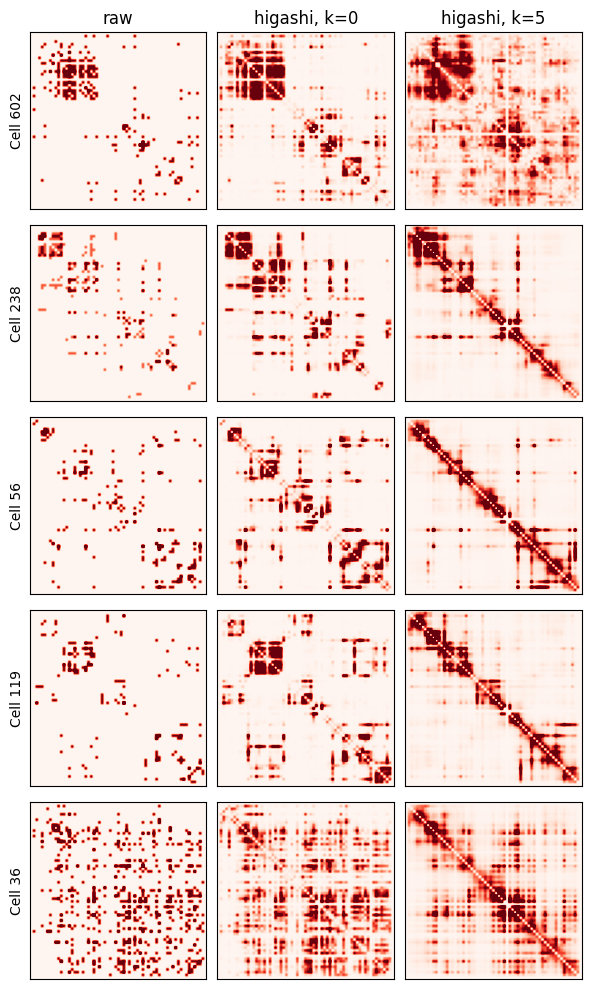

In [43]:
count = 0
fig = plt.figure(figsize=(6, 2*5))
i = 0
for id_ in np.random.randint(0, 620, 620):
    if i == 5:
        break
    ori, nbr0, nbr5 = higashi_model.fetch_map("chr3", id_)
    # print('ori.data.shape: ', ori.data.shape)
    if ori.data.shape[0] == 0:
        continue
    else:
        i += 1
    count += 1
    ax = plt.subplot(5, 3, count * 3 - 2)
    ax.imshow(ori.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori.data, 0.6))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("raw")
    ax.set_ylabel(f'Cell {id_}')

    
    ax = plt.subplot(5, 3, count * 3 - 1)
    ax.imshow(nbr0.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=0")
    
    ax = plt.subplot(5, 3, count * 3)
    ax.imshow(nbr5.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=5")

plt.tight_layout()
# plt.suptitle('Chromosome 3')

plt.savefig(f'/n/home09/pren/figures/dnamerfish_imputation_{tid}.png')